# Analiza podatkov sistema BicikeLJ

In [46]:
# Matplotlib inline
%matplotlib inline
# Imports
from urllib.request import urlopen
import json
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
# Figure size and style
plt.rcParams['figure.figsize'] = (15, 10)
#plt.style.use('ggplot')

Branje podatkov po protokolih, opisanih v: https://developer.jcdecaux.com/#/opendata/vls?page=getstarted

Zanimiva je diplomska naloga: http://geo.ff.uni-lj.si/pisnadela/pdfs/zaksem_201409_ziga_jamnik.pdf

In [2]:
# Parameters
# Bycicle, station dynamic infos
station_data_url = "https://api.jcdecaux.com/vls/v1/stations?contract=Ljubljana&apiKey=0a494317d60d3d556d0755600b078ea6b26af90f"
# Station info dataframe
station_info_fn = "bicikelj_station_info.csv"
station_data_fn = "bicikelj_station_data_1701.csv"

## Station info

In [48]:
response = urlopen(station_data_url)
if response.code == 200:
    data = response.read().decode('utf-8')
else:
    print("Wrong response from ", station_data_url)

In [49]:
station_info_json = json.loads(data)

In [50]:
station_info = pd.DataFrame(station_info_json).sort_values(["number"]).reset_index(drop=True)

In [51]:
station_info.columns

Index(['address', 'available_bike_stands', 'available_bikes', 'banking',
       'bike_stands', 'bonus', 'contract_name', 'last_update', 'name',
       'number', 'position', 'status'],
      dtype='object')

In [52]:
station_info = station_info[['address', 'banking', 'bike_stands', 'bonus', 'name',
                             'number', 'position', 'status']].copy()

In [53]:
station_info = pd.concat([station_info.drop(['position'], axis=1), station_info["position"].apply(pd.Series)], axis=1)
station_info.head()

,address,banking,bike_stands,bonus,name,number,status,lat,lng
0,Prešernov trg 6,False,20,False,PREŠERNOV TRG-PETKOVŠKOVO NABREŽJE,1,OPEN,46.051367,14.506542
1,Pogačarjev trg 3,False,18,False,POGAČARJEV TRG-TRŽNICA,2,OPEN,46.051093,14.507186
2,Kongresni trg 3,False,20,False,KONGRESNI TRG-ŠUBIČEVA ULICA,3,OPEN,46.050388,14.504623
3,Cankarjeva cesta 1,False,26,False,CANKARJEVA UL.-NAMA,4,OPEN,46.052431,14.503257
4,Breg 20,False,20,False,BREG,5,OPEN,46.046498,14.505148


In [54]:
# Save to CSV
station_info.to_csv(station_info_fn, index=True)

In [70]:
station_info_s = station_info[["bike_stands", "name", "number"]]
station_info_s = station_info_s.set_index("number")

In [72]:
station_info_s

,bike_stands,name
number,,
1,20,PREŠERNOV TRG-PETKOVŠKOVO NABREŽJE
2,18,POGAČARJEV TRG-TRŽNICA
3,20,KONGRESNI TRG-ŠUBIČEVA ULICA
4,26,CANKARJEVA UL.-NAMA
5,20,BREG
6,18,GRUDNOVO NABREŽJE-KARLOVŠKA C.
7,18,MIKLOŠIČEV PARK
8,22,BAVARSKI DVOR
9,26,TRG OF-KOLODVORSKA UL.


## Branje podatkov o postajah

In [33]:
station_data_full = pd.read_csv(station_data_fn, index_col="last_update_time", parse_dates=True)

In [34]:
station_data_full.describe()

,available_bike_stands,available_bikes,bike_stands,number
count,365.000000,365.000000,365.000000,365.000000
mean,12.676712,6.942466,20.205479,17.043836
std,5.129063,4.605238,2.974982,10.112186
min,0.000000,0.000000,8.000000,1.000000
25%,9.000000,3.000000,18.000000,9.000000
50%,13.000000,6.000000,20.000000,16.000000
75%,16.000000,11.000000,21.000000,26.000000
max,26.000000,19.000000,26.000000,38.000000


In [35]:
station_data_full.index.min()

Timestamp('2017-01-23 12:29:24')

In [36]:
station_data_full.index.max()

Timestamp('2017-01-24 07:38:12')

In [37]:
station_data_full.head()

,available_bike_stands,available_bikes,bike_stands,number
last_update_time,,,,
2017-01-23 12:29:24,9,11,20,36
2017-01-23 12:29:41,13,5,18,6
2017-01-23 12:30:19,14,4,18,22
2017-01-23 12:30:21,4,12,16,13
2017-01-23 12:30:23,12,8,20,5


In [77]:
station_data_available = station_data_full.pivot(columns='number', values='available_bike_stands')

In [81]:
station_data_hour = station_data_available.groupby(station_data_available.index.hour).aggregate("mean")

## Porazdelitev razpoložljivih koled glede na uro

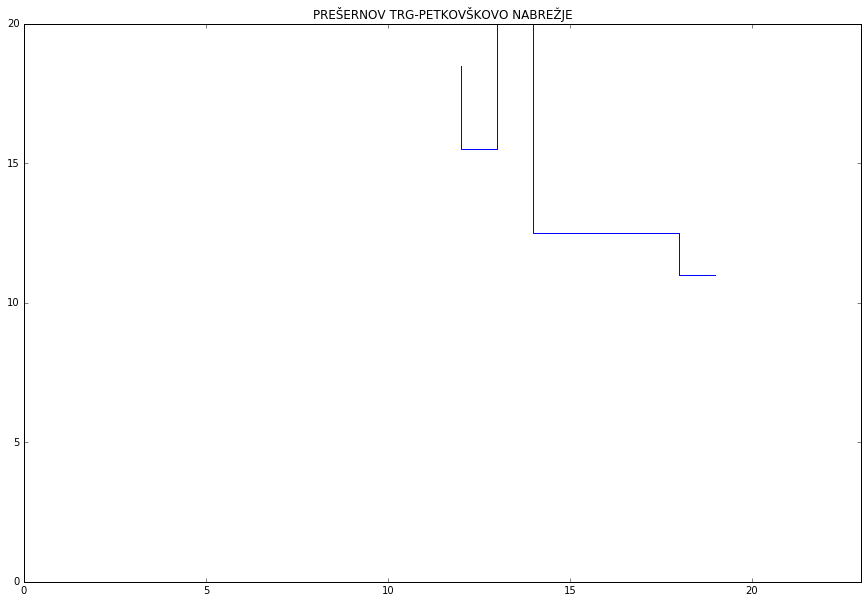

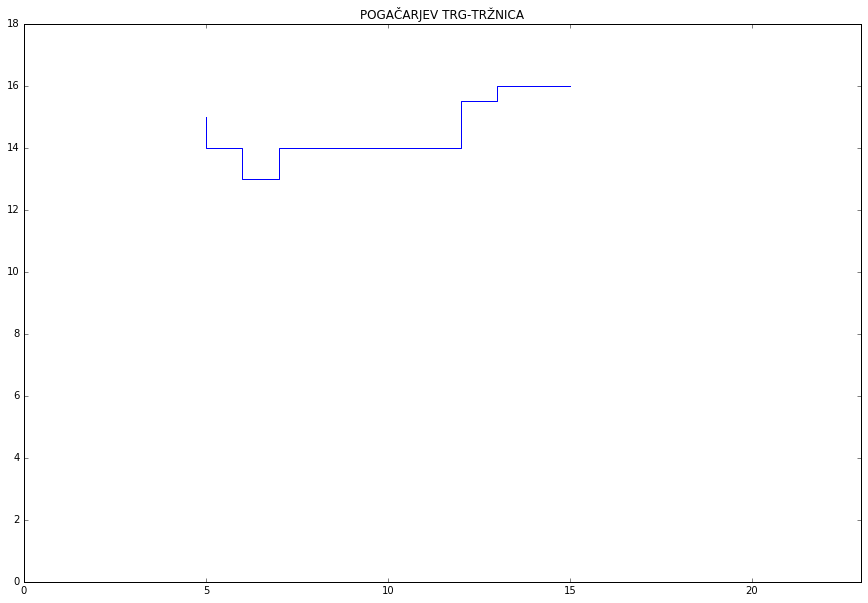

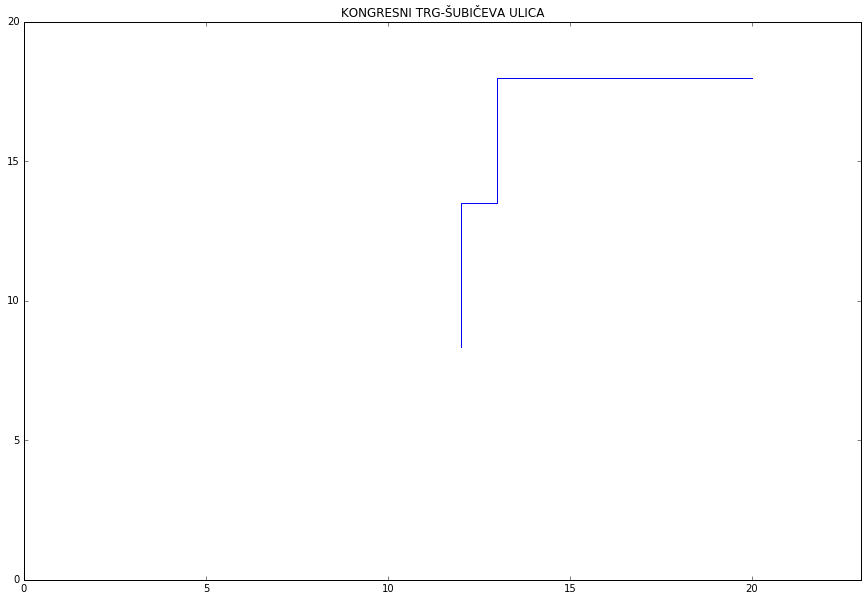

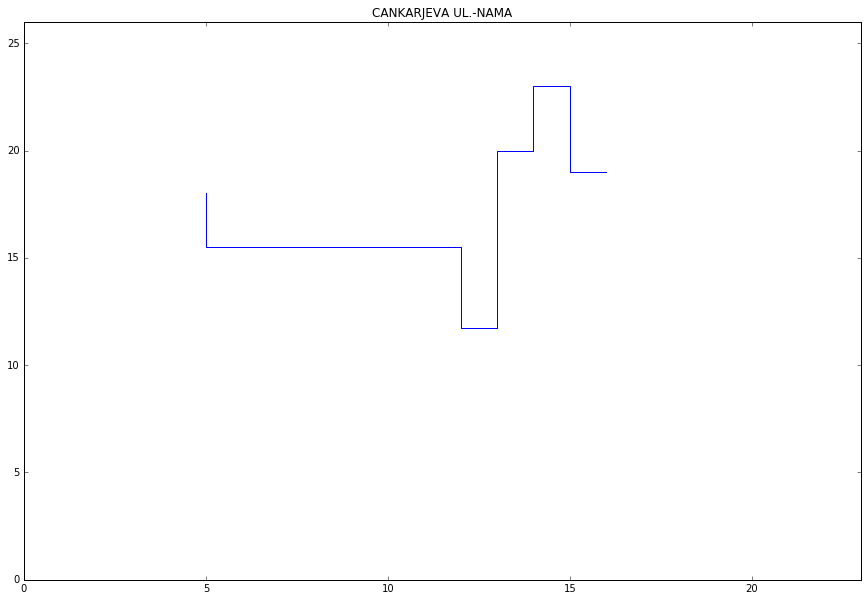

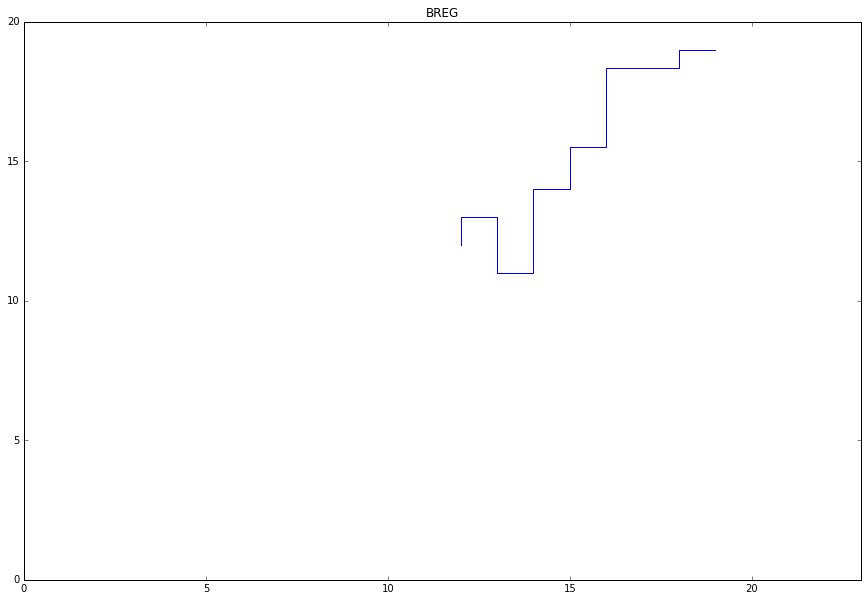

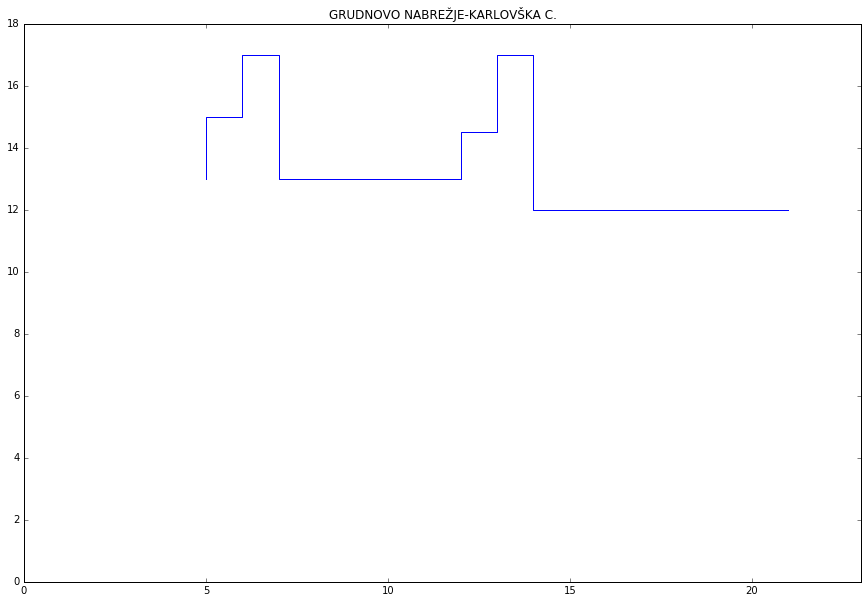

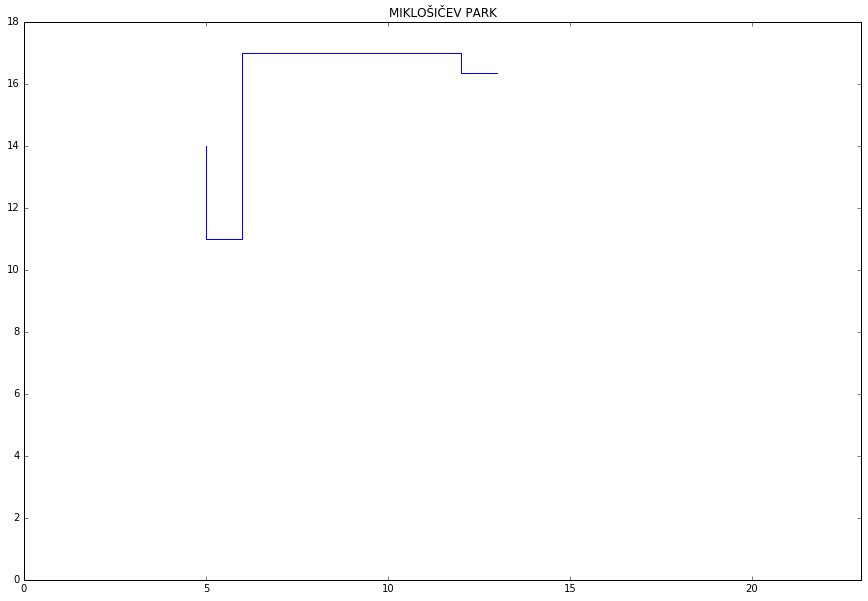

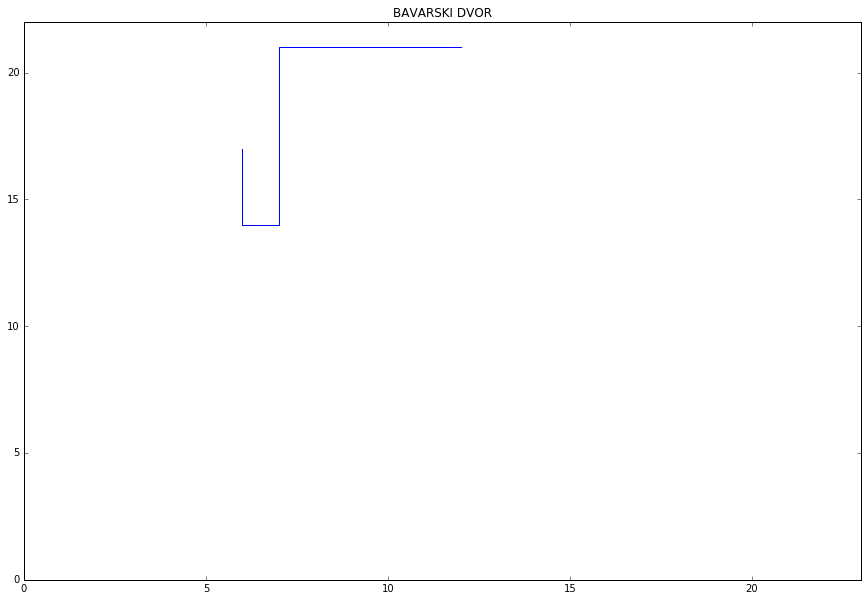

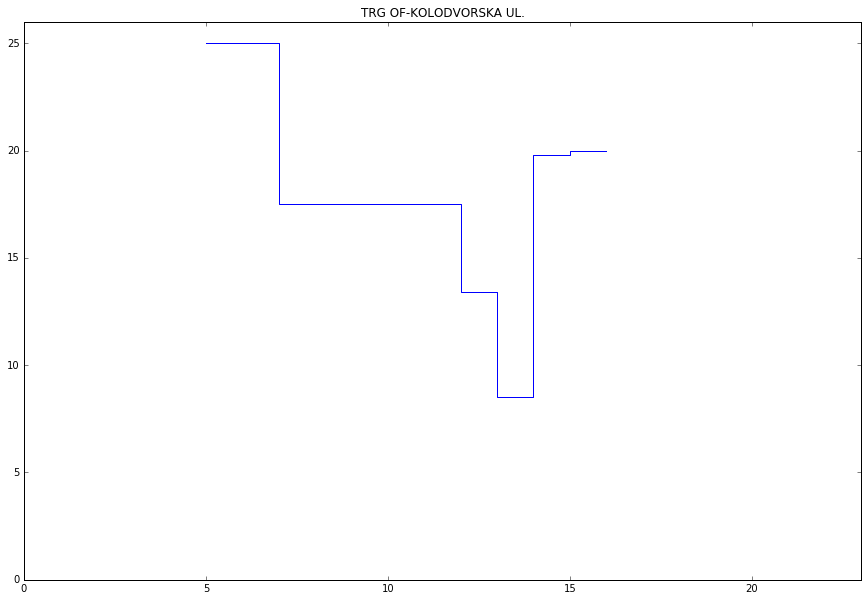

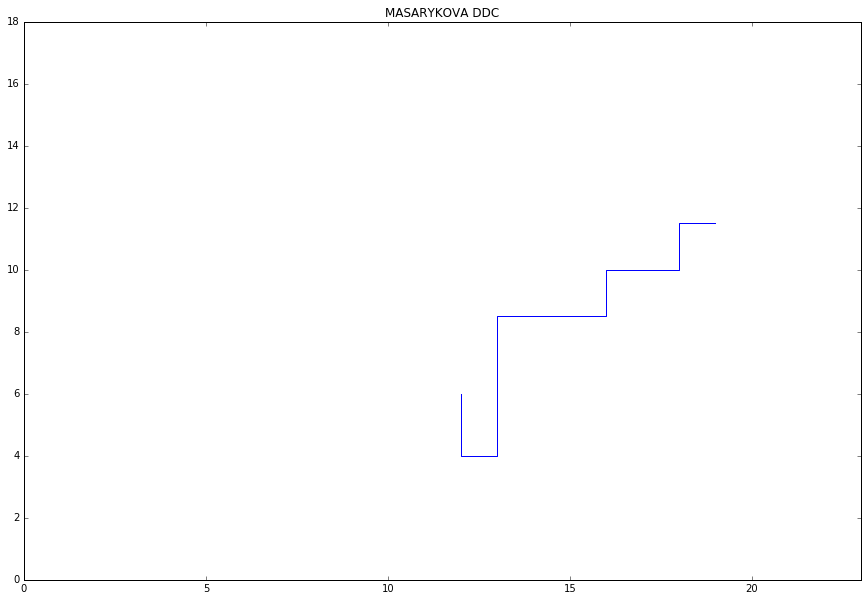

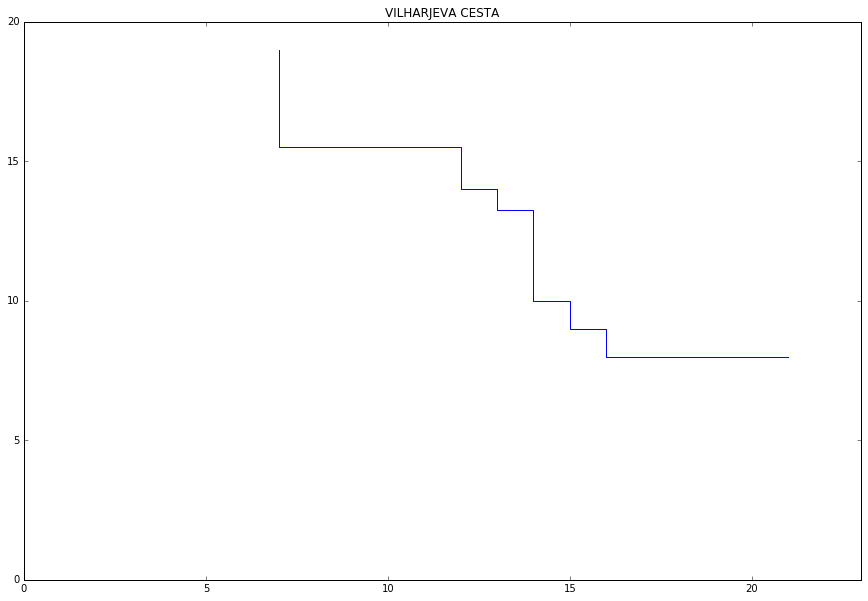

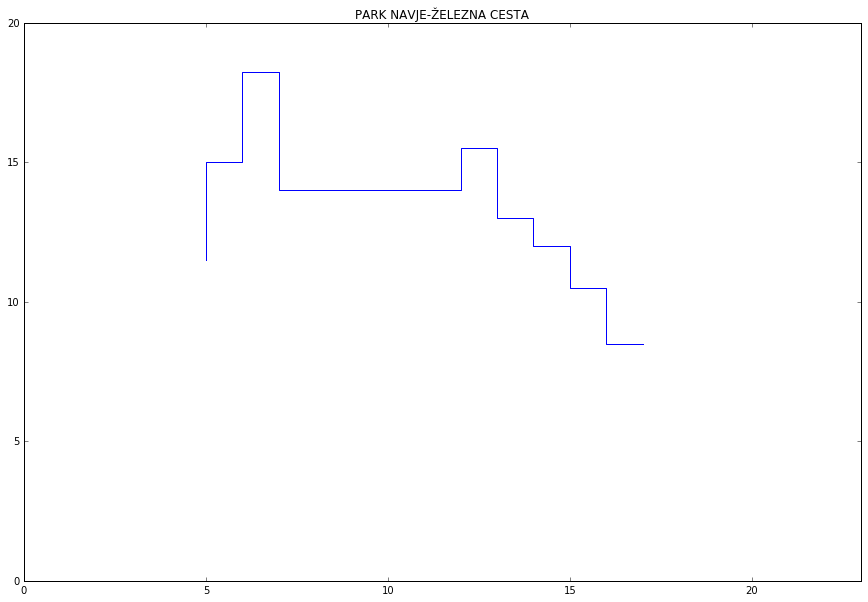

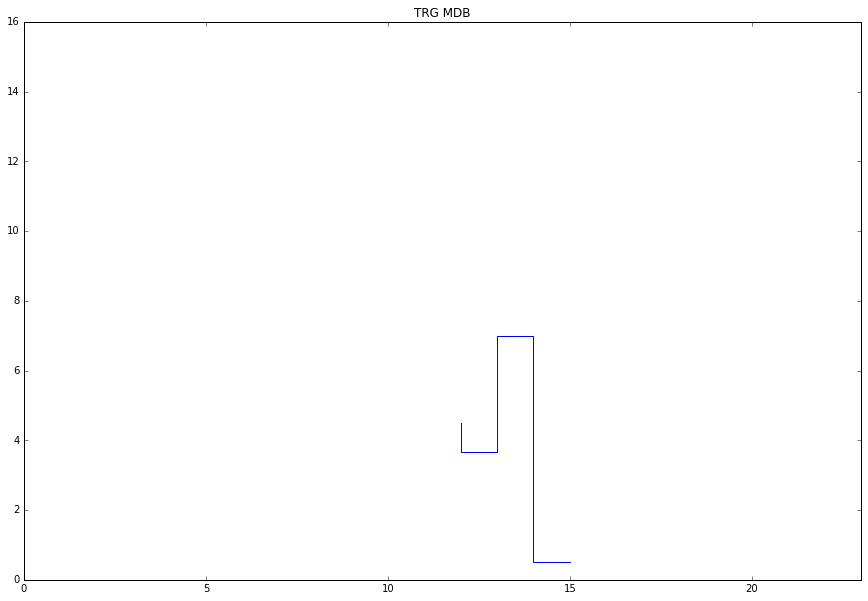

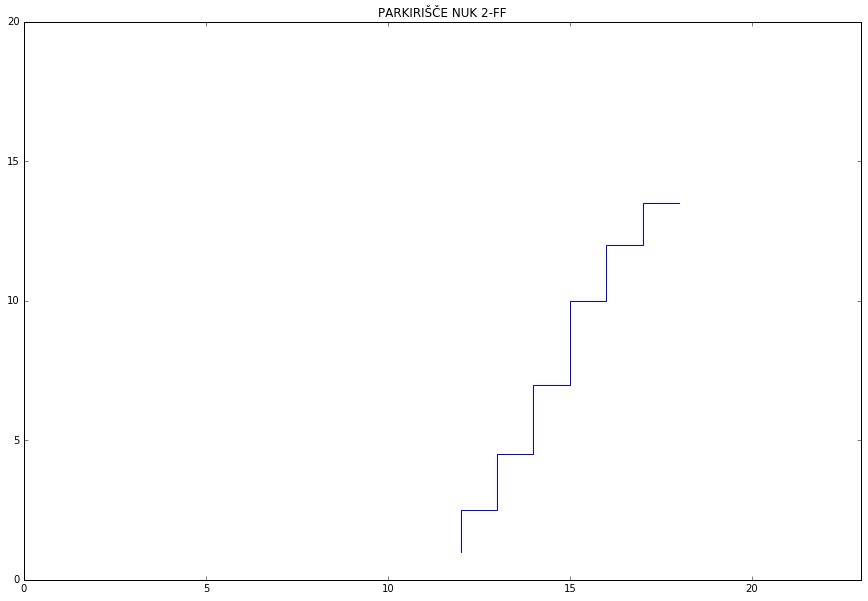

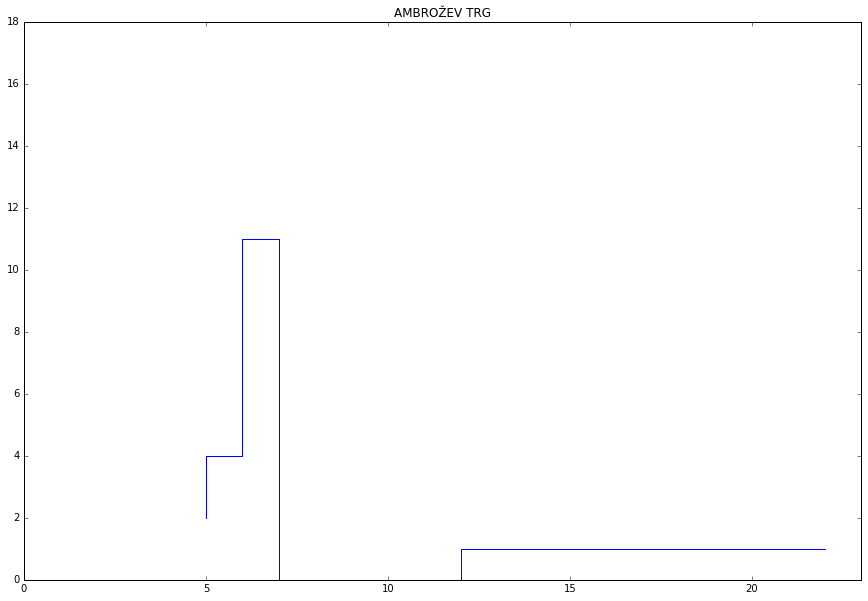

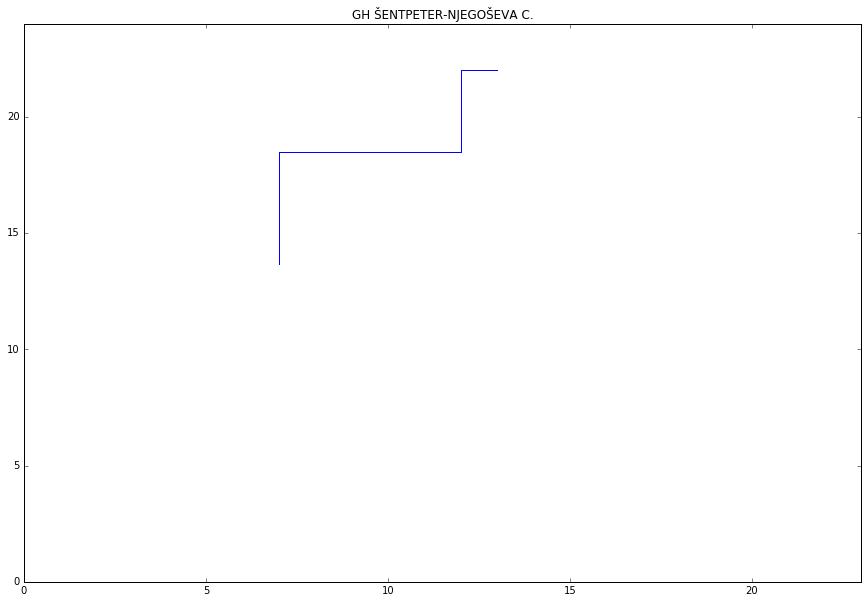

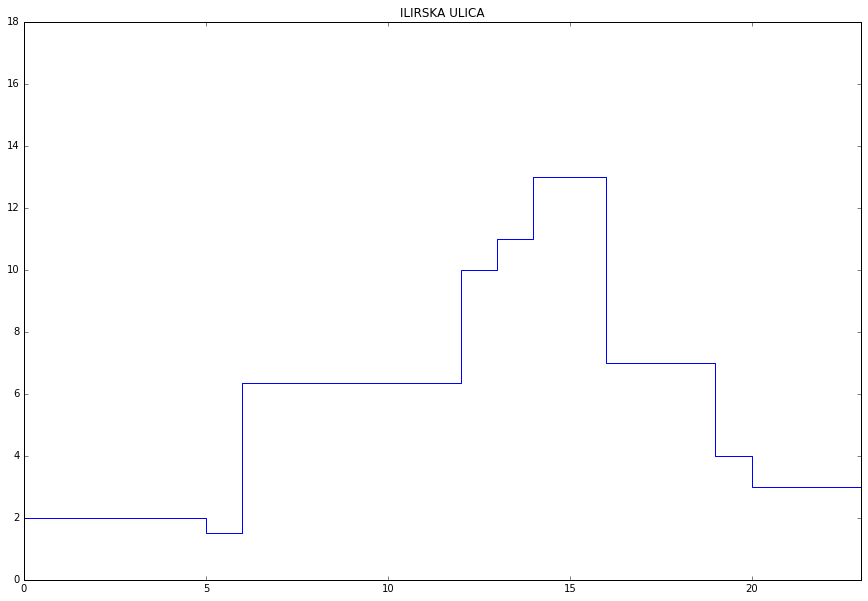

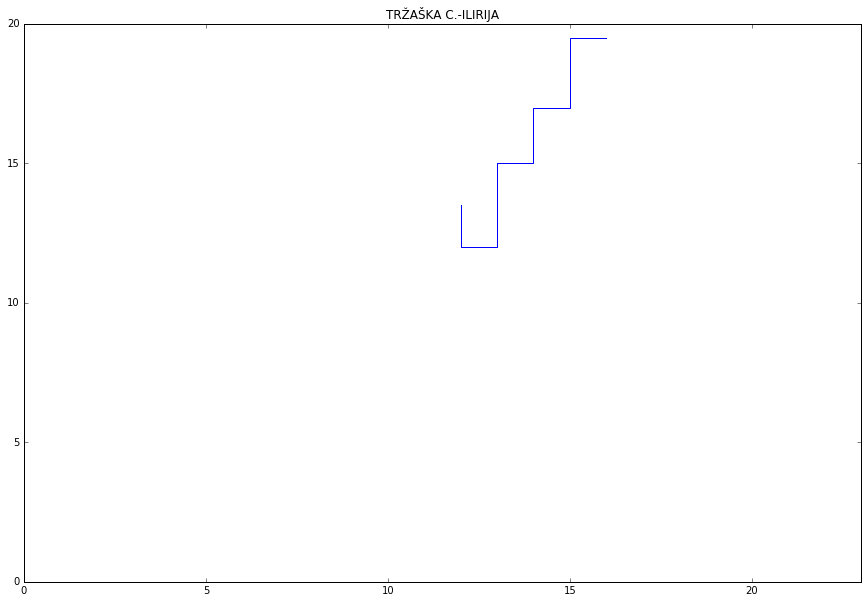

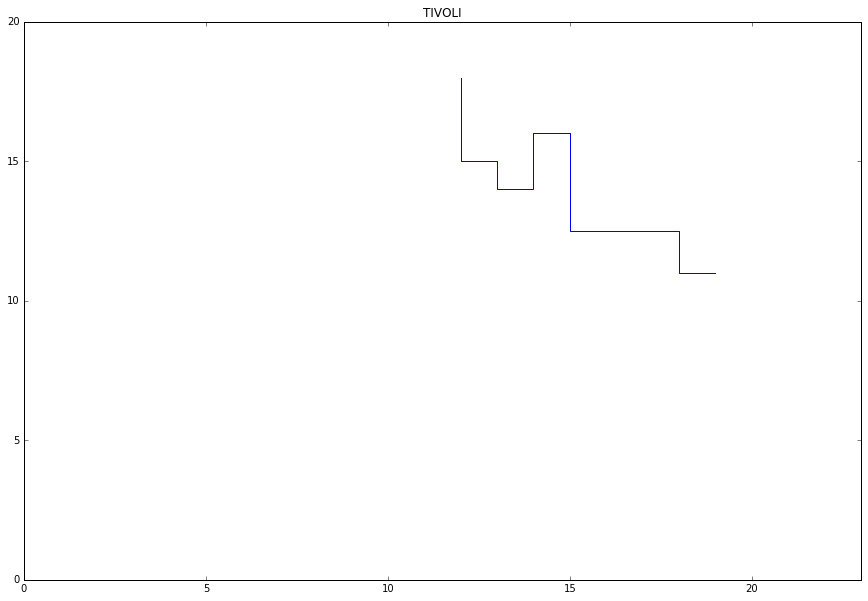

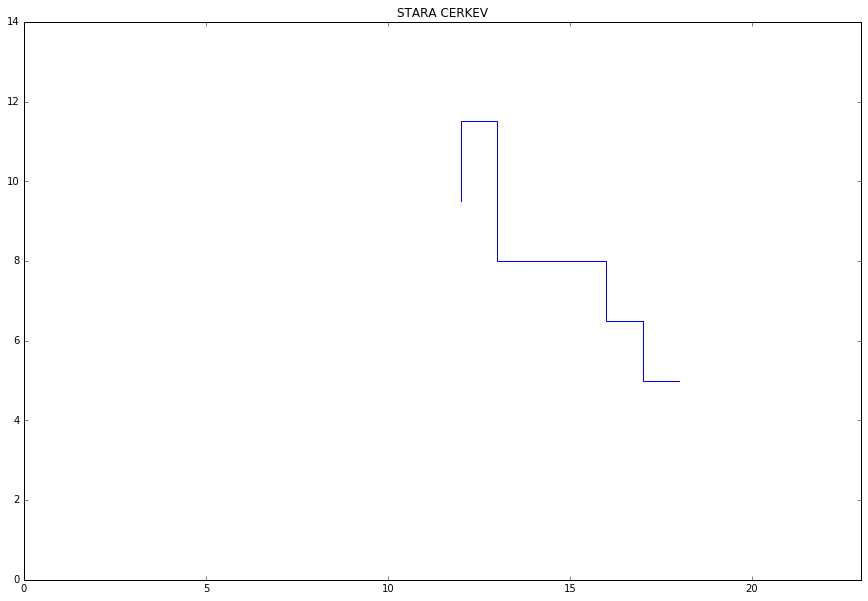

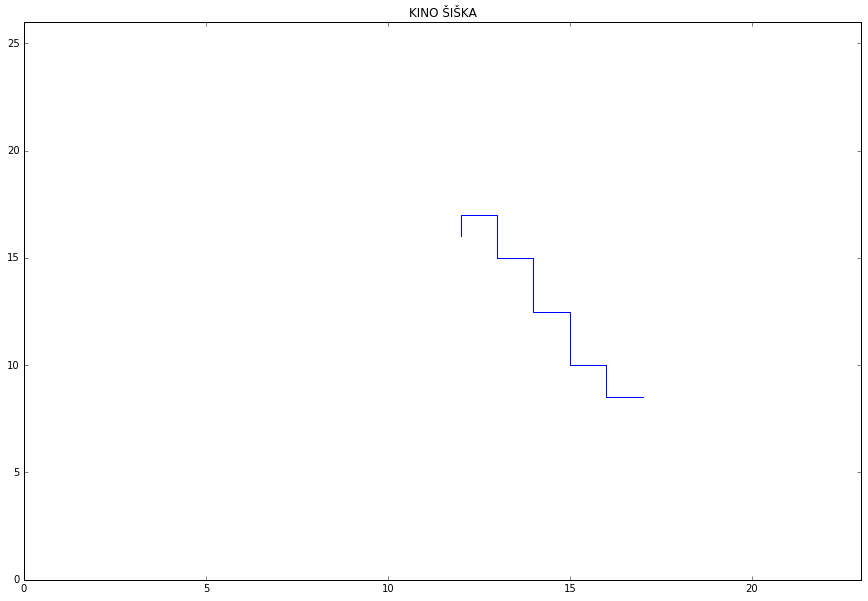

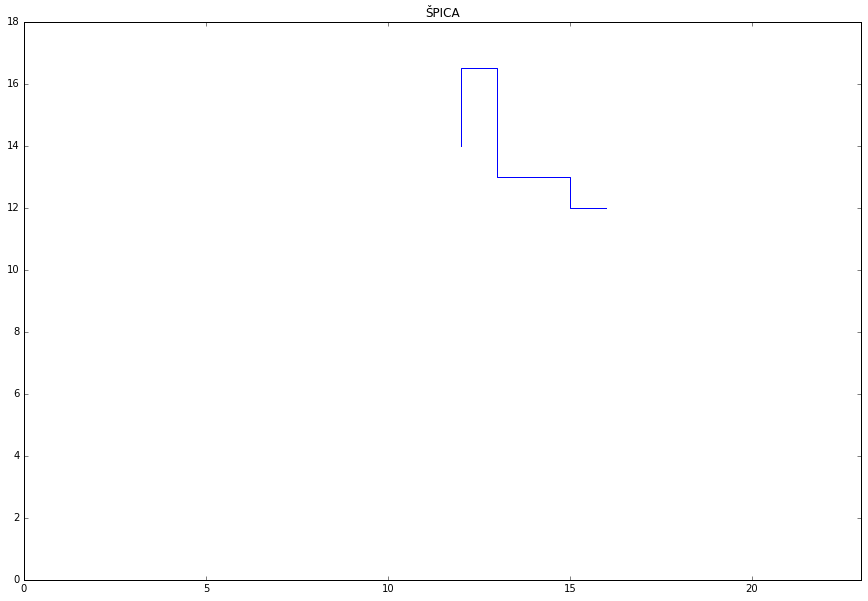

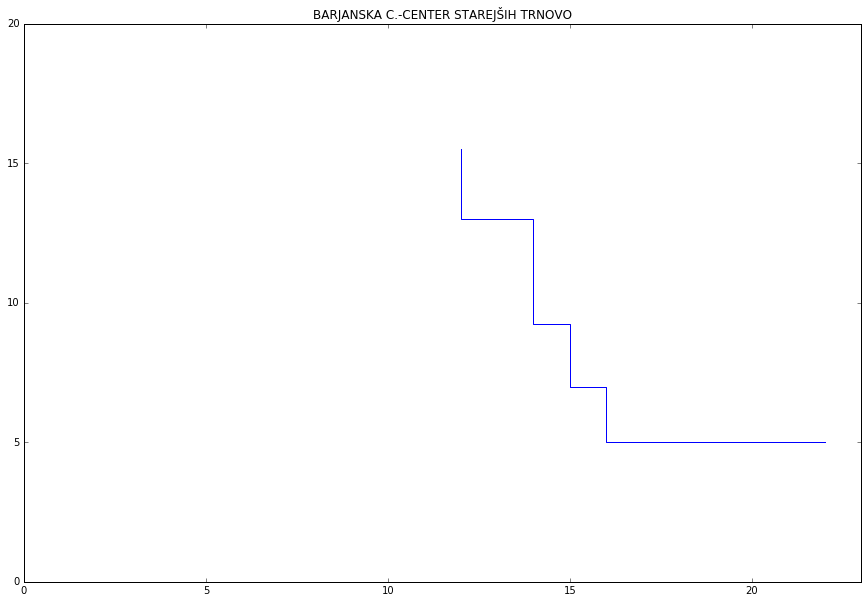

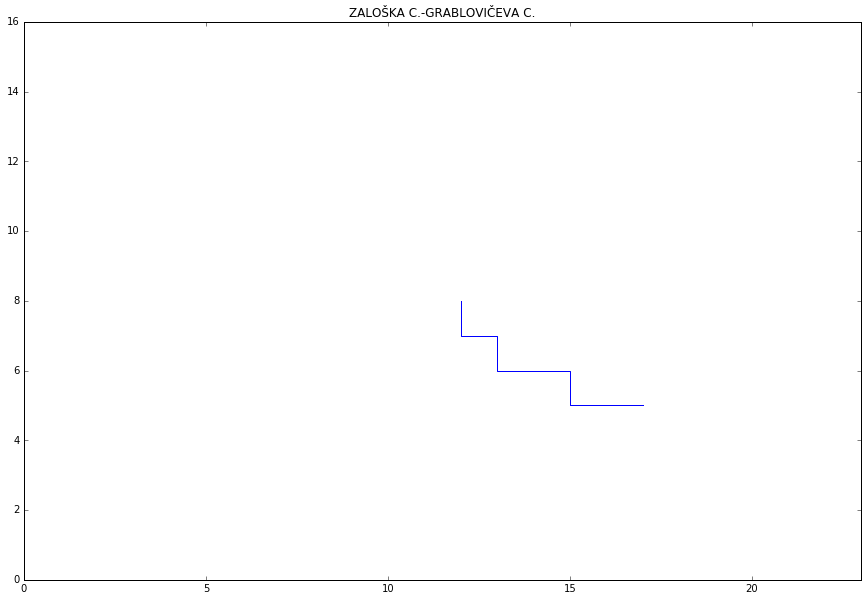

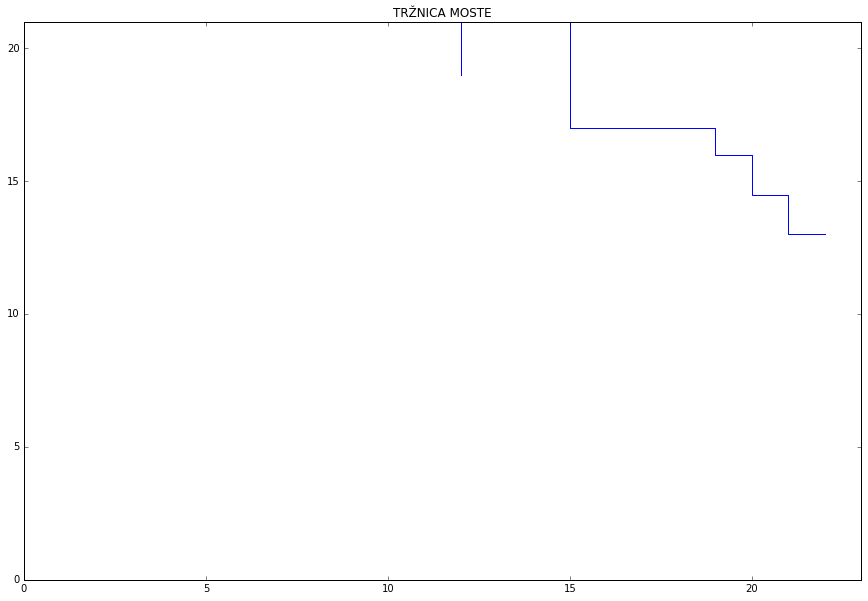

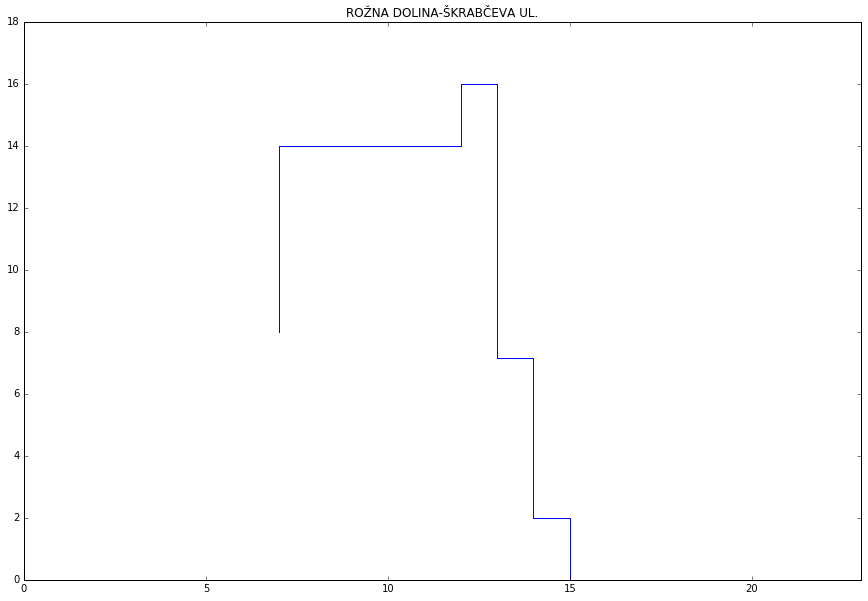

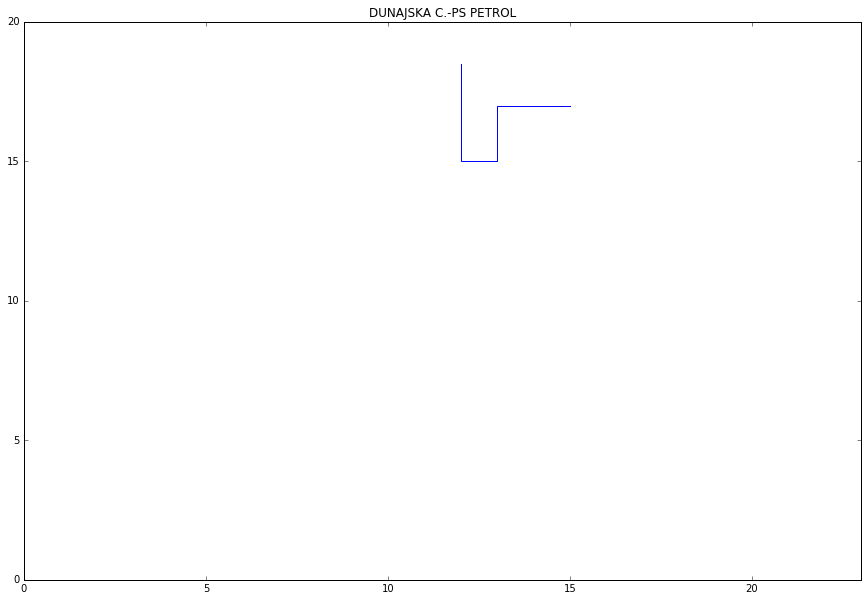

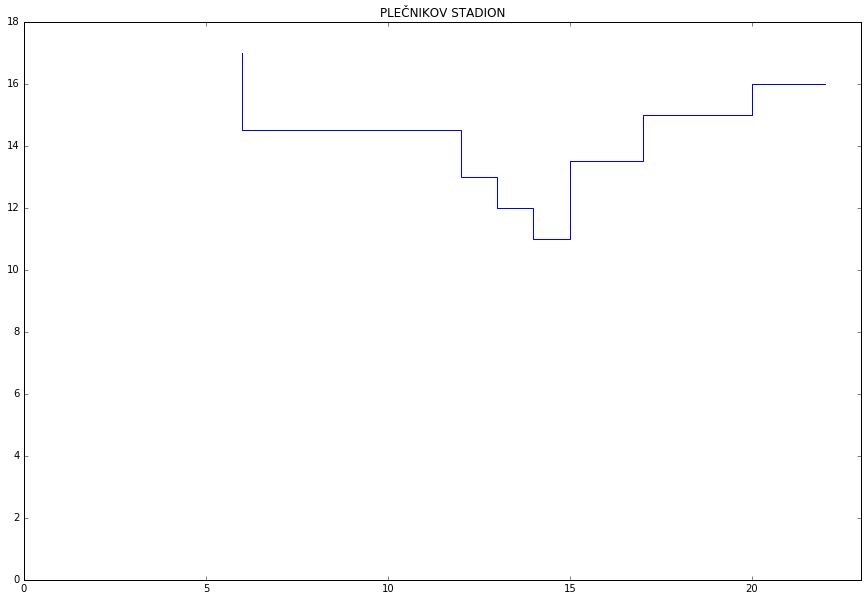

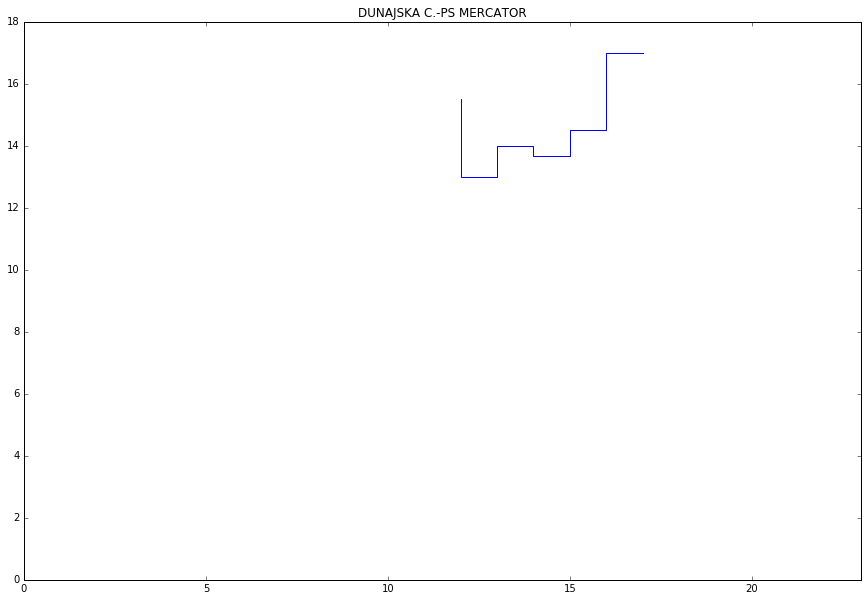

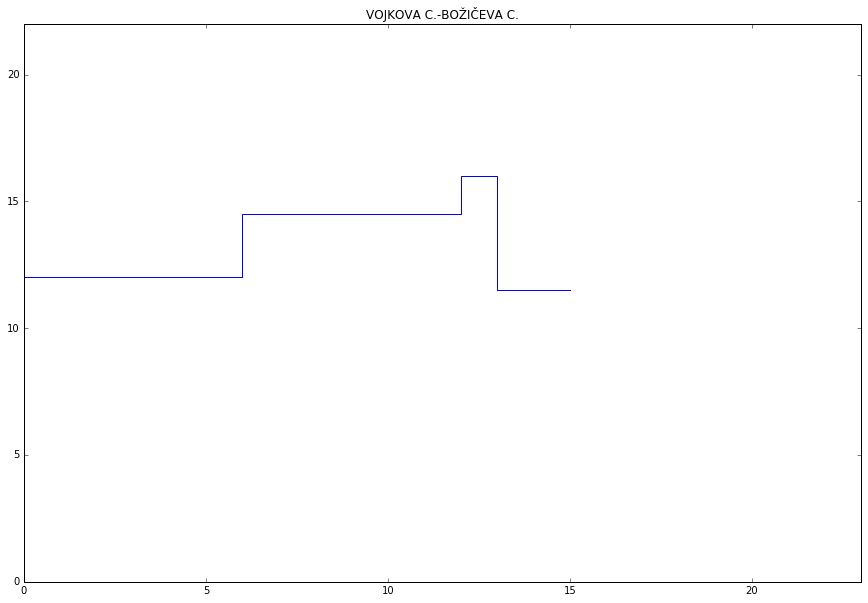

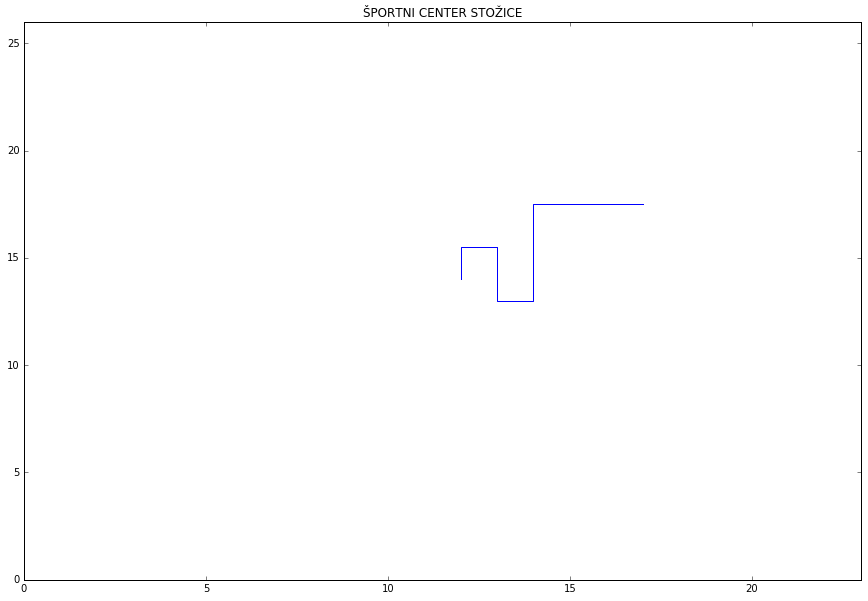

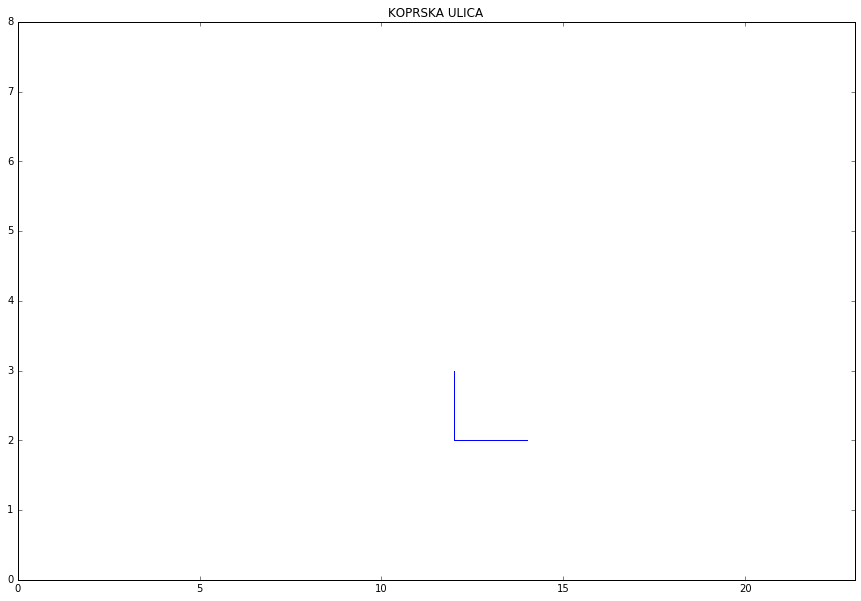

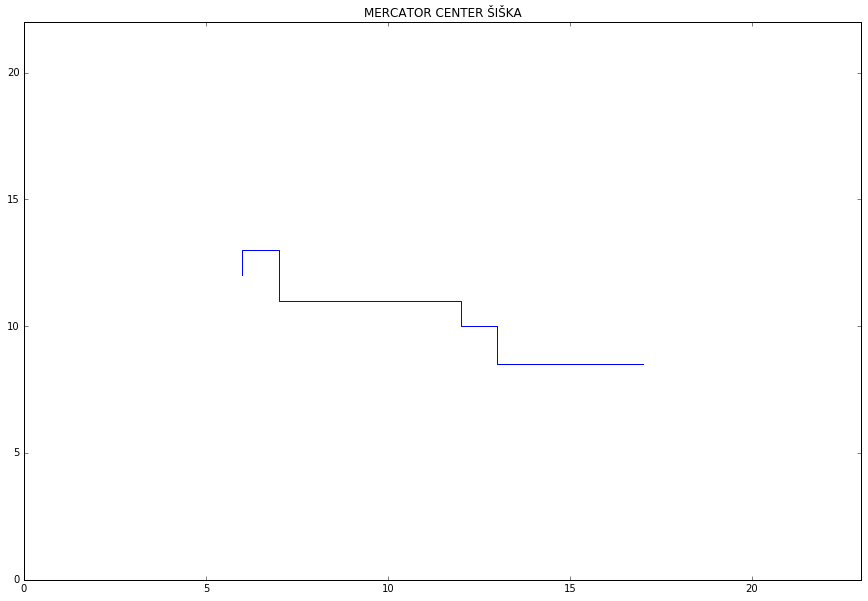

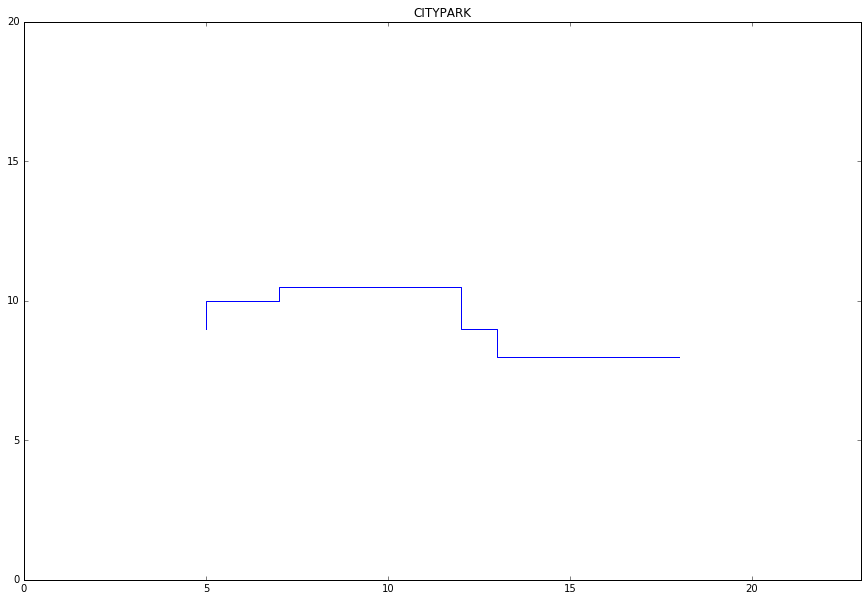

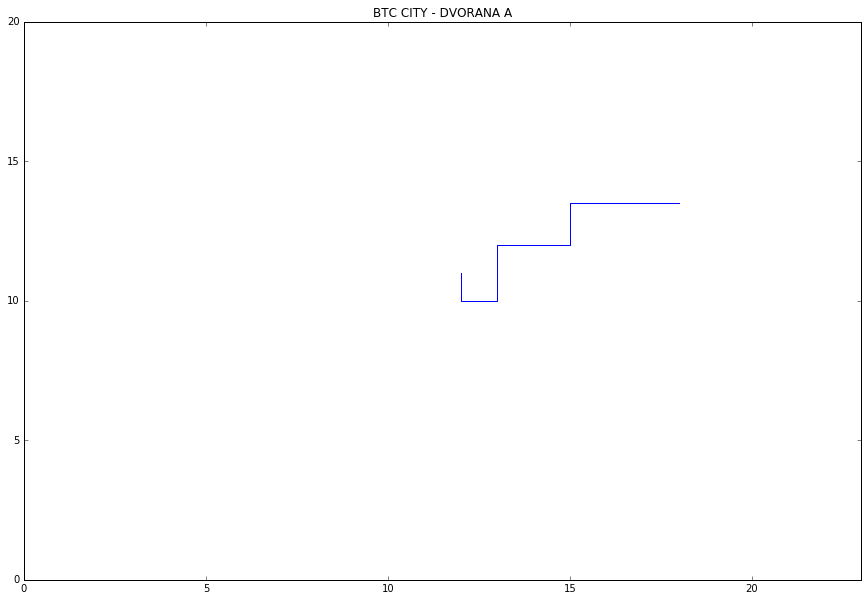

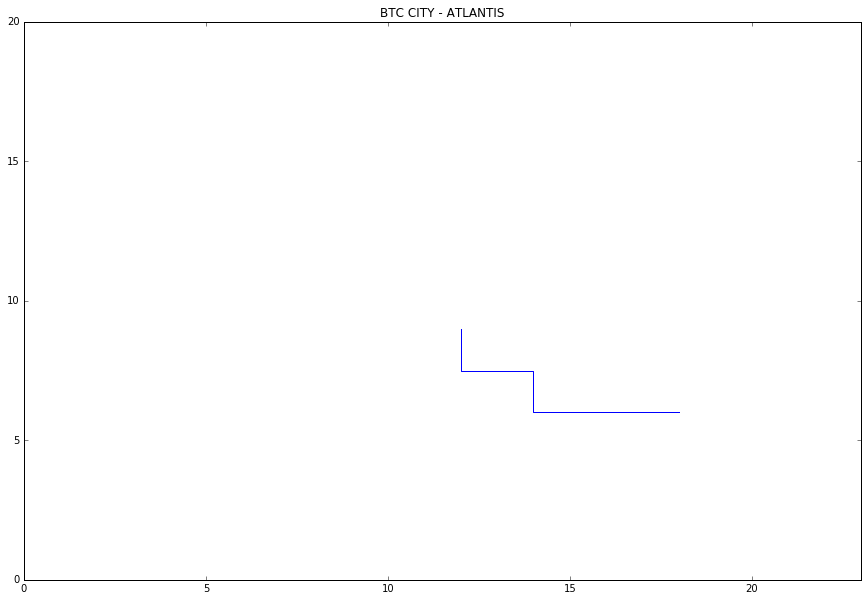

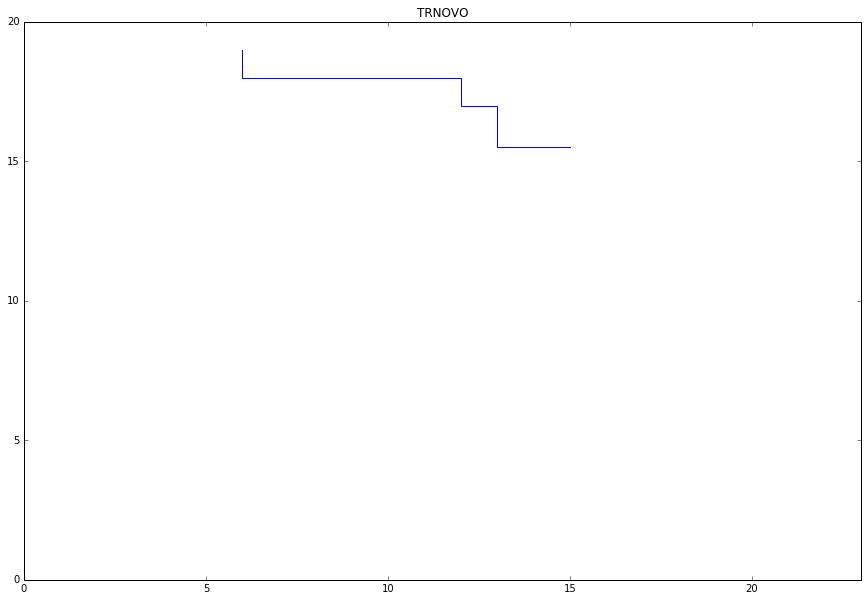

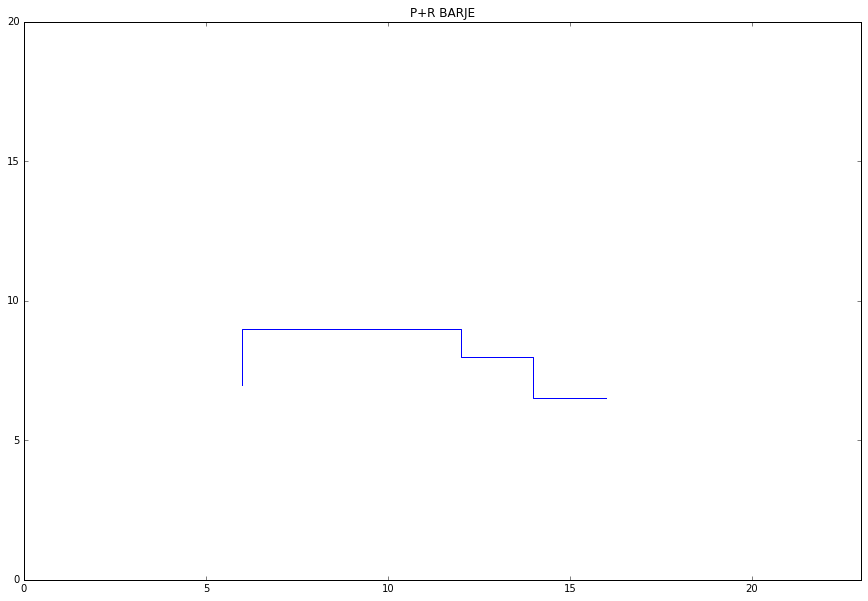

In [84]:
for col in station_data_hour.columns:
    data = station_data_hour[col].dropna()
    plt.title(station_info_s["name"][col])
    plt.ylim(0, station_info_s["bike_stands"][col])
    plt.xlim(0,23)
    plt.plot(data, linestyle="steps")
    plt.show()

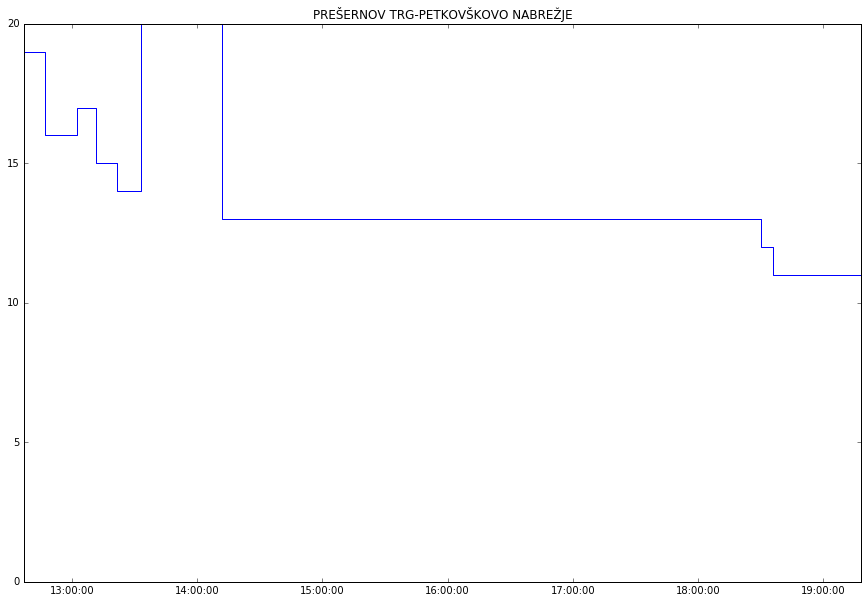

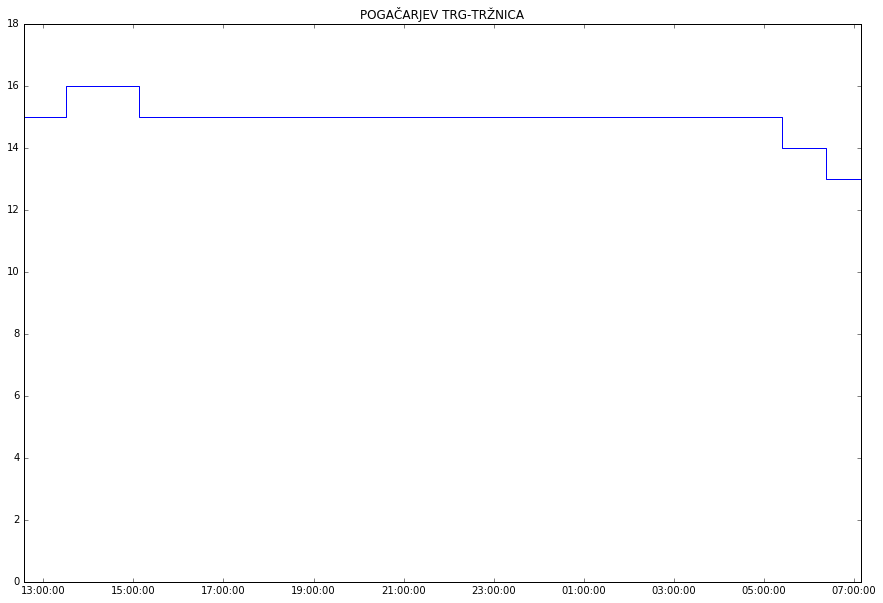

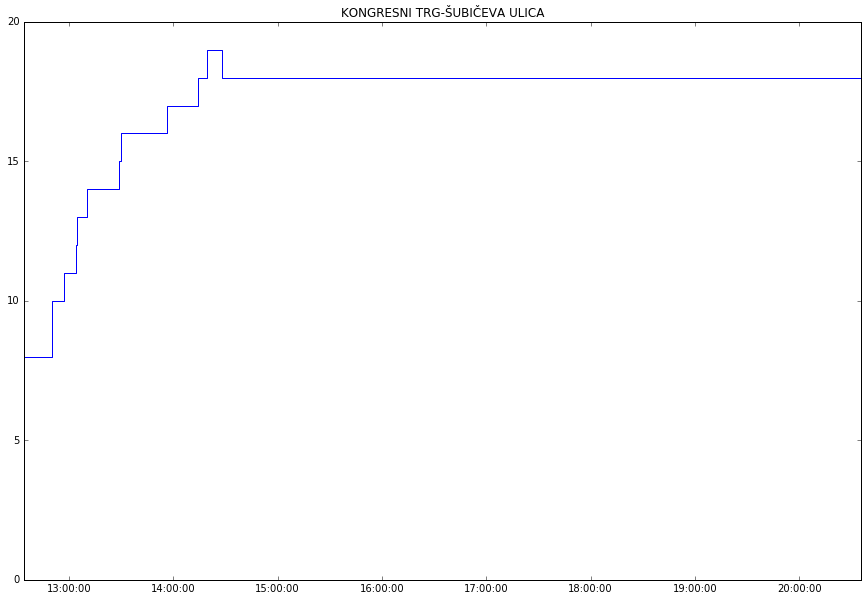

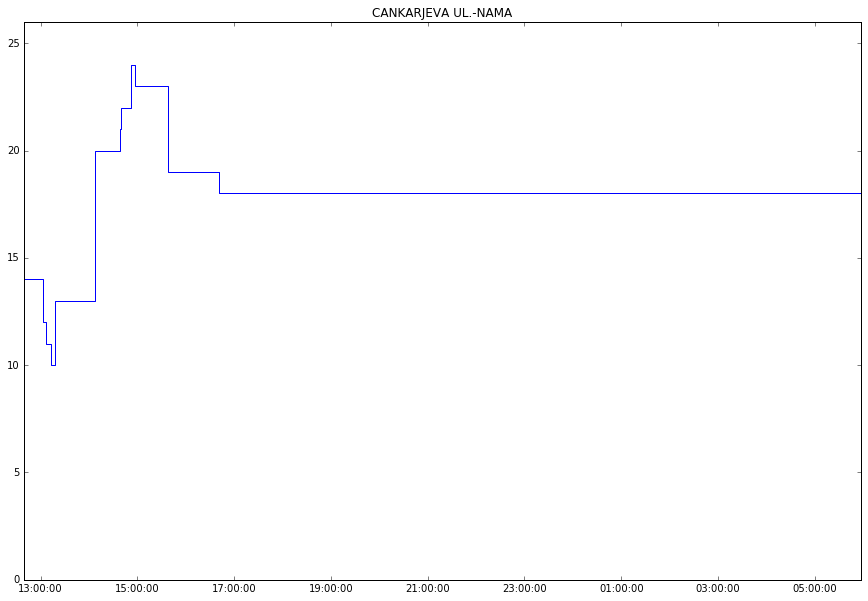

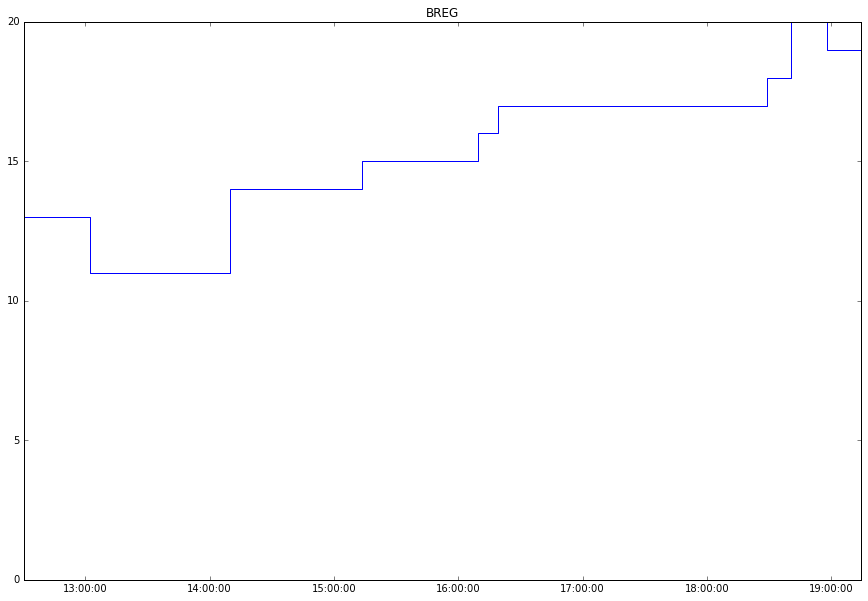

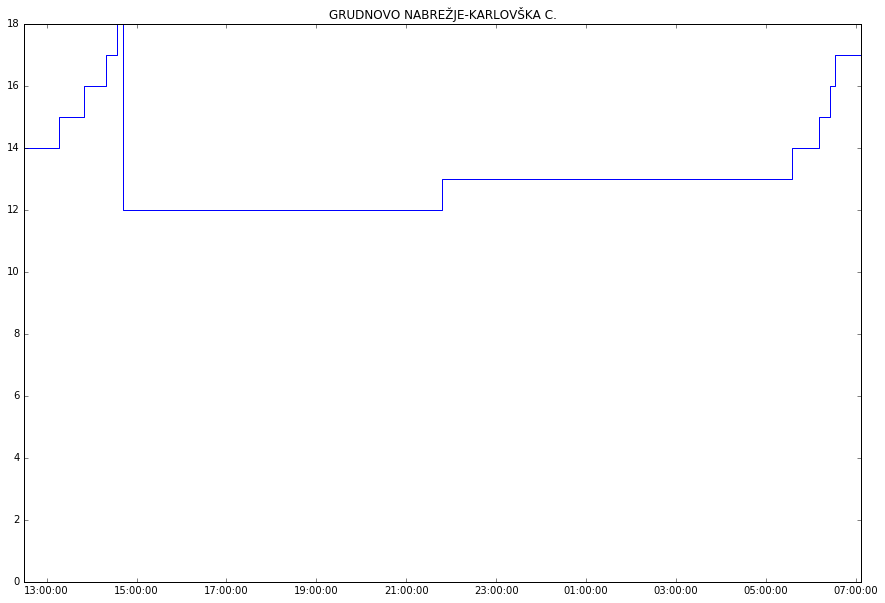

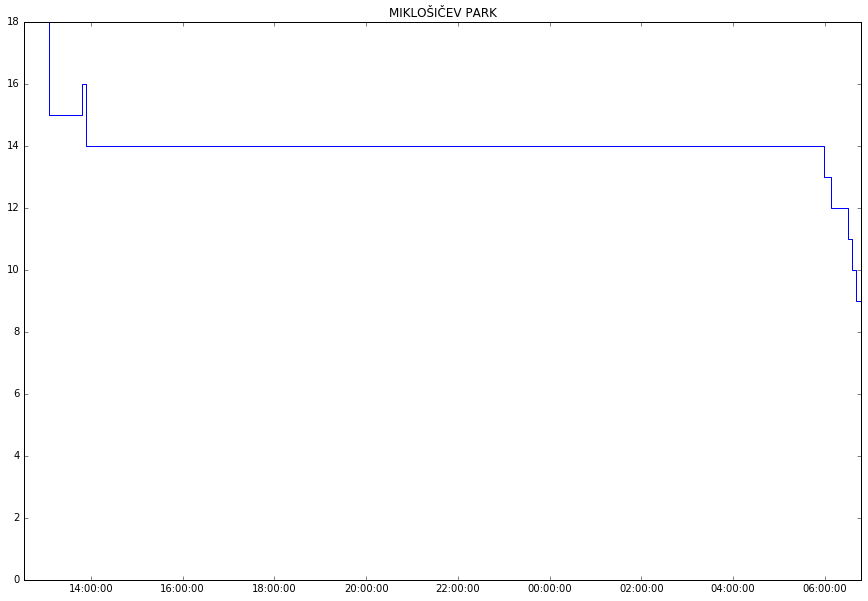

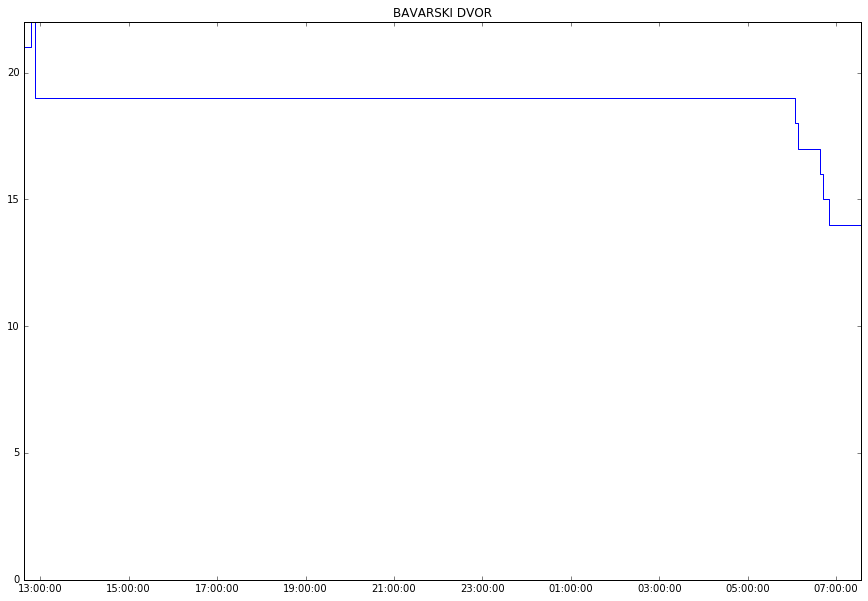

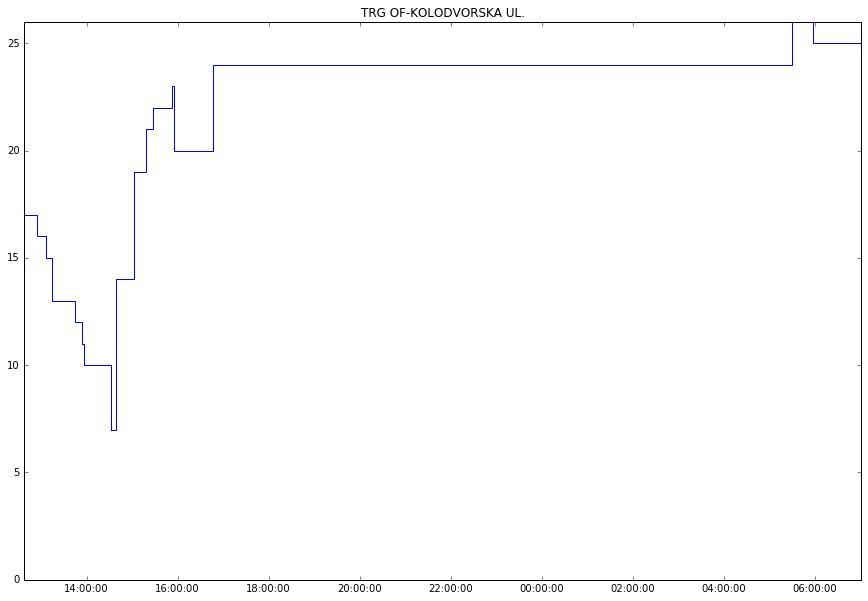

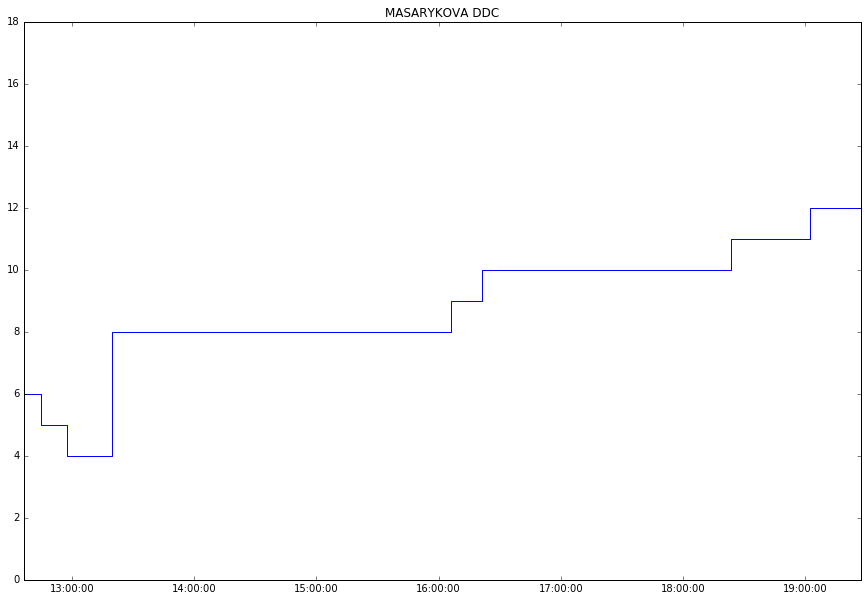

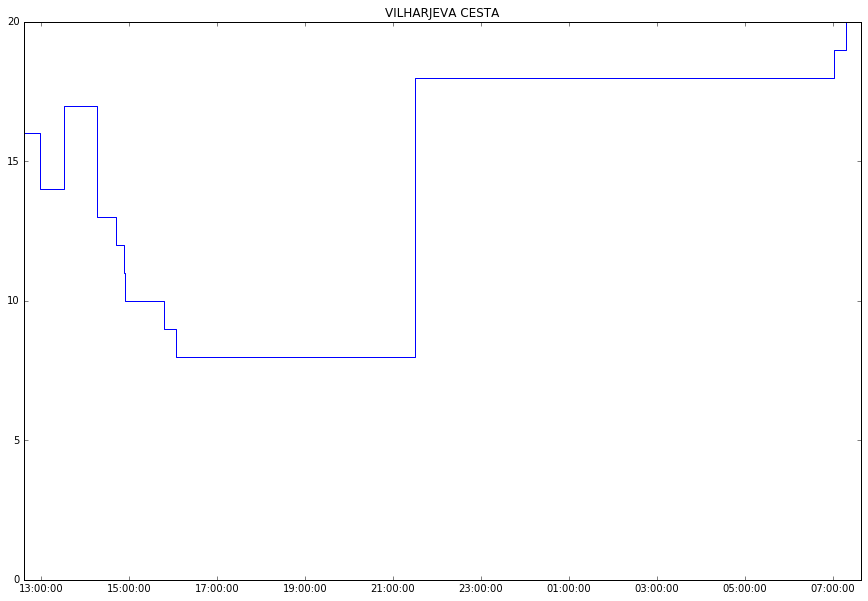

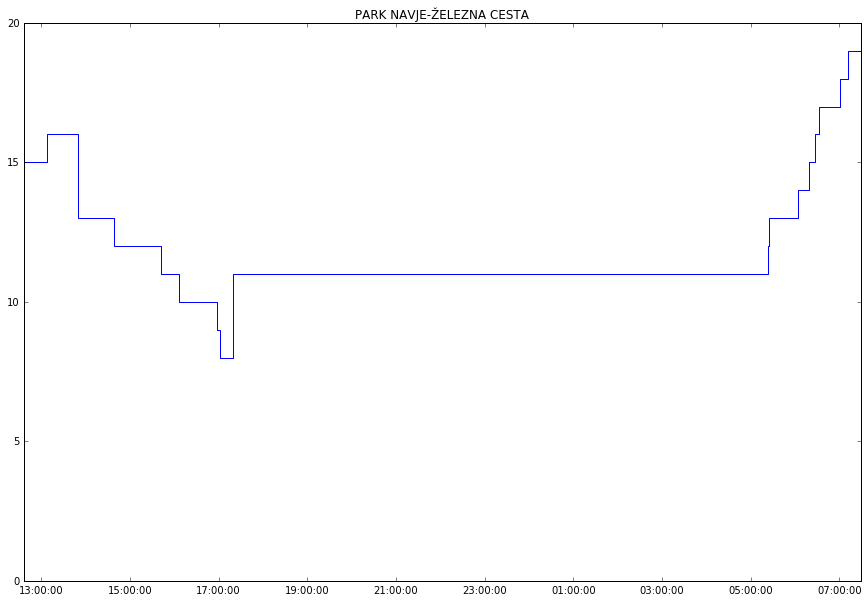

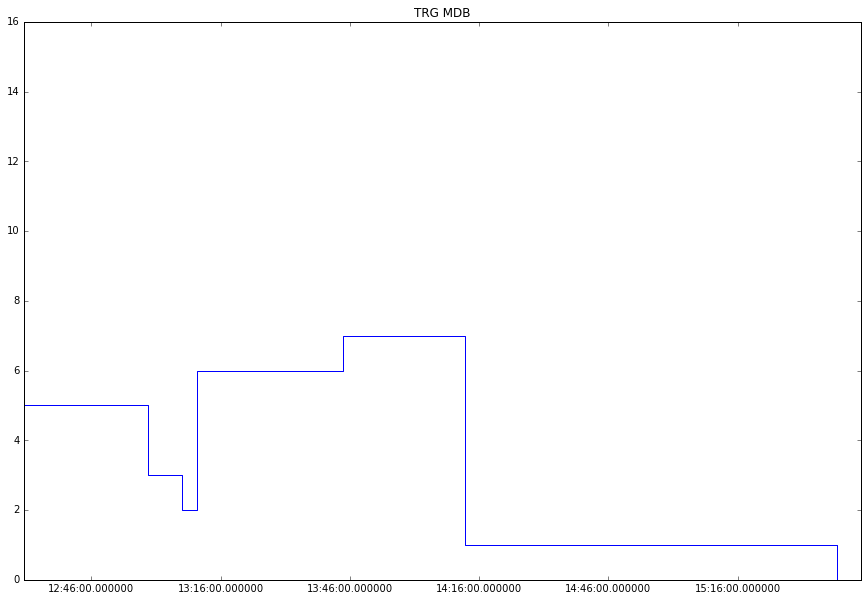

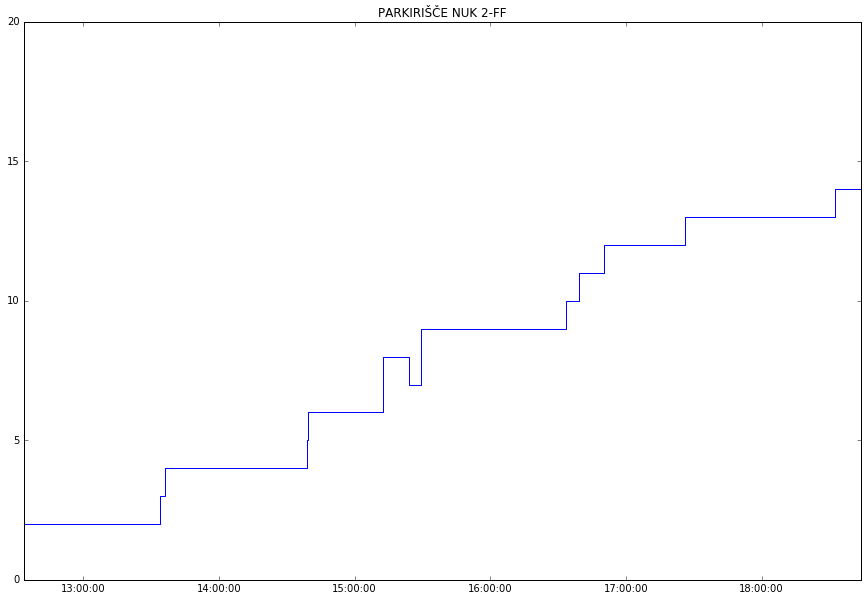

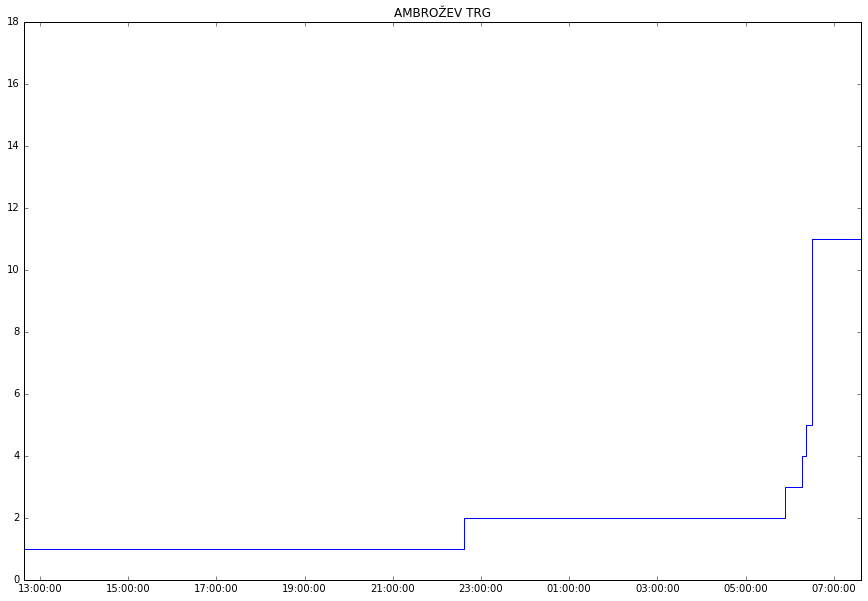

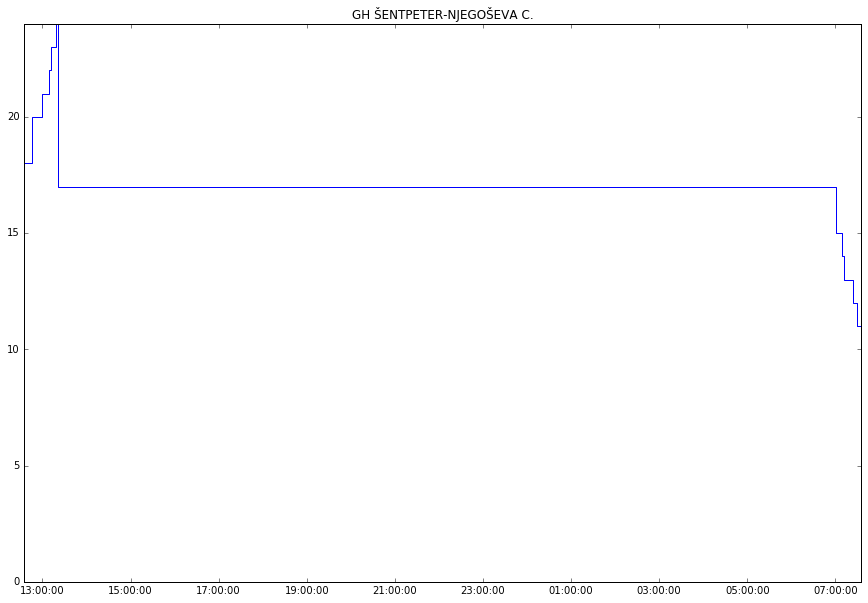

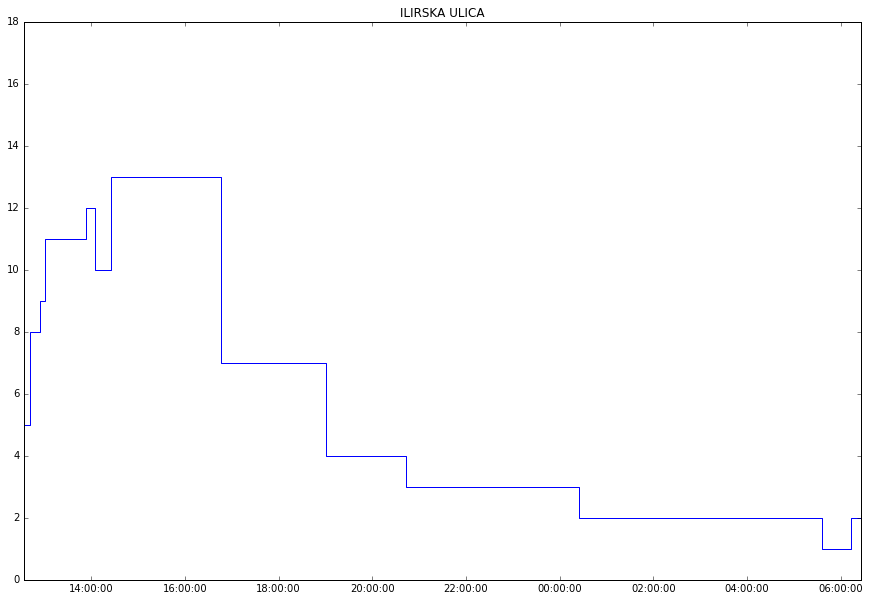

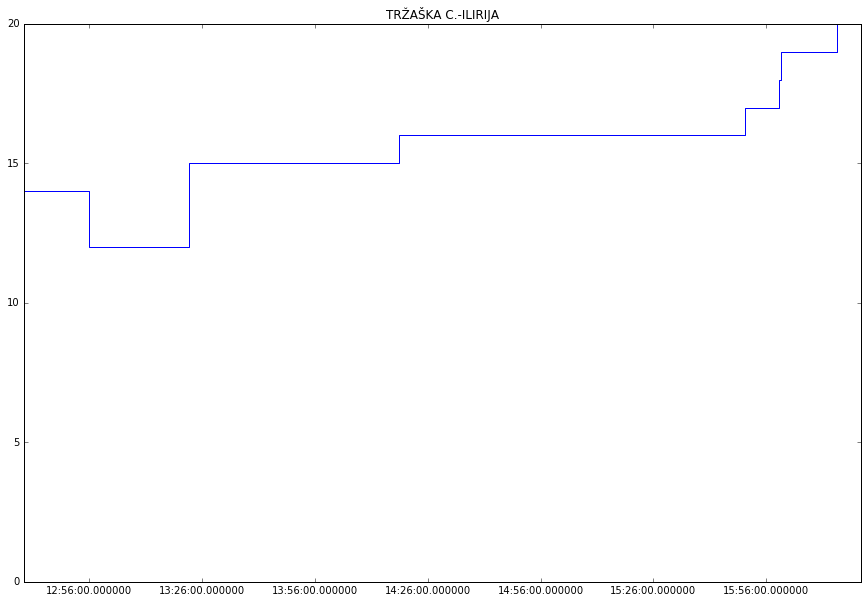

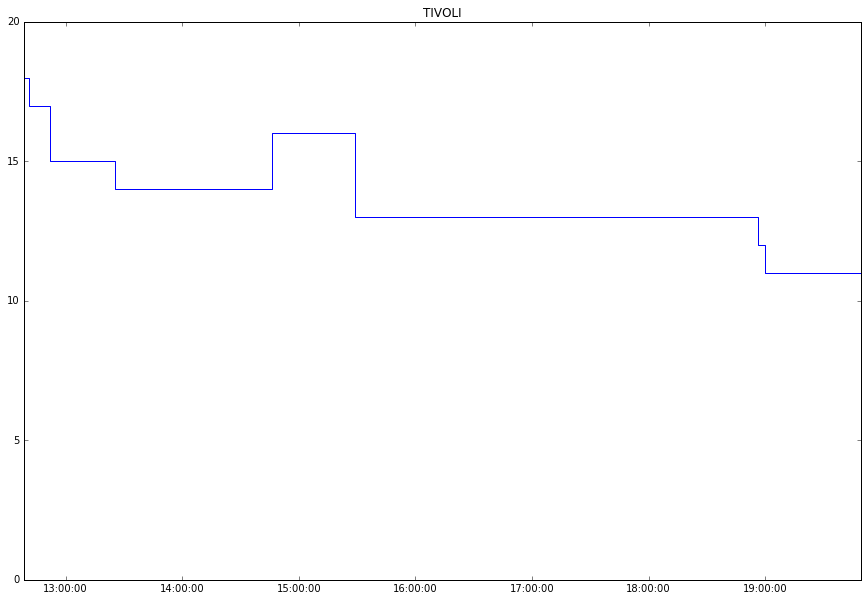

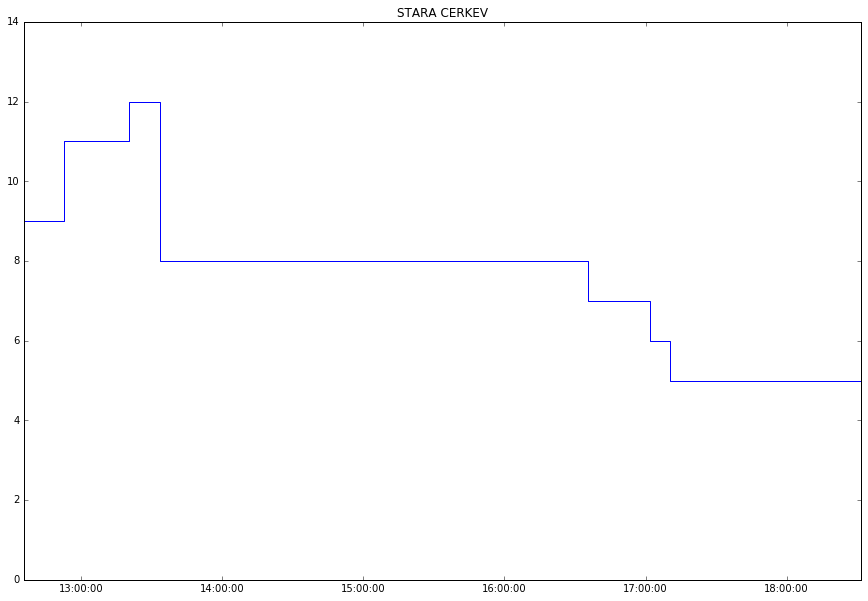

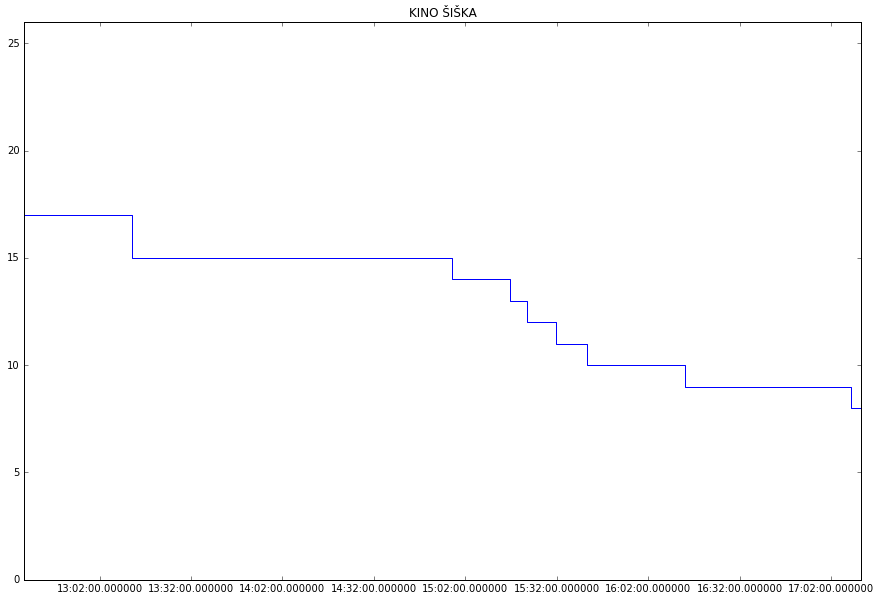

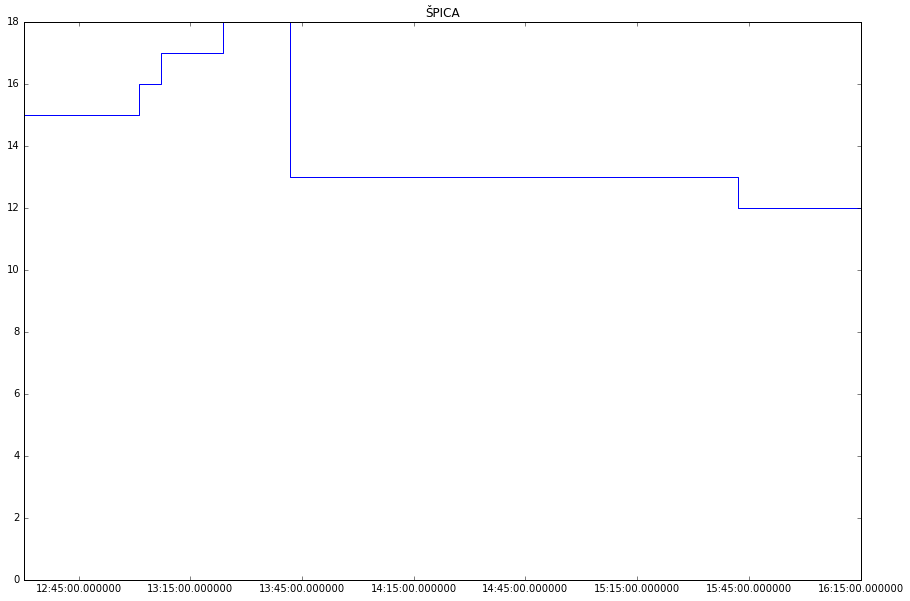

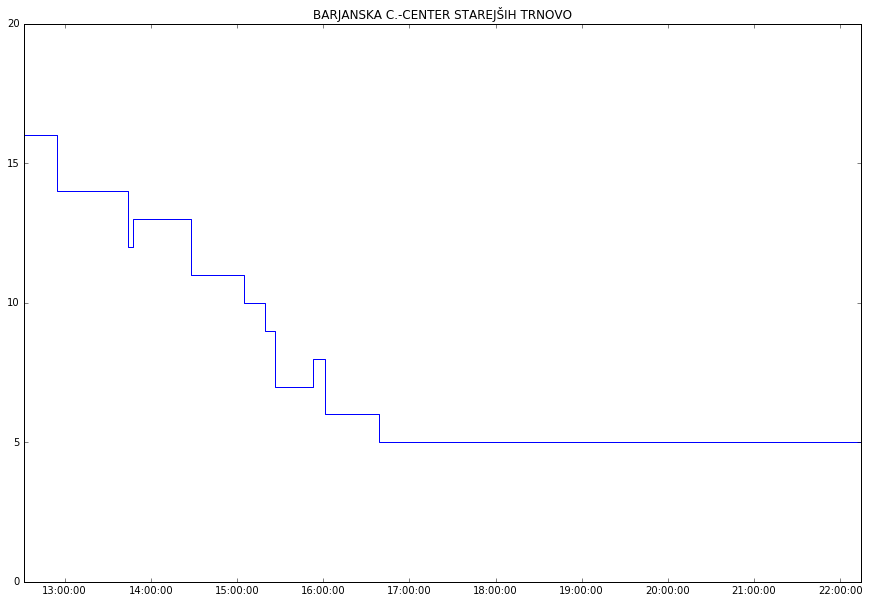

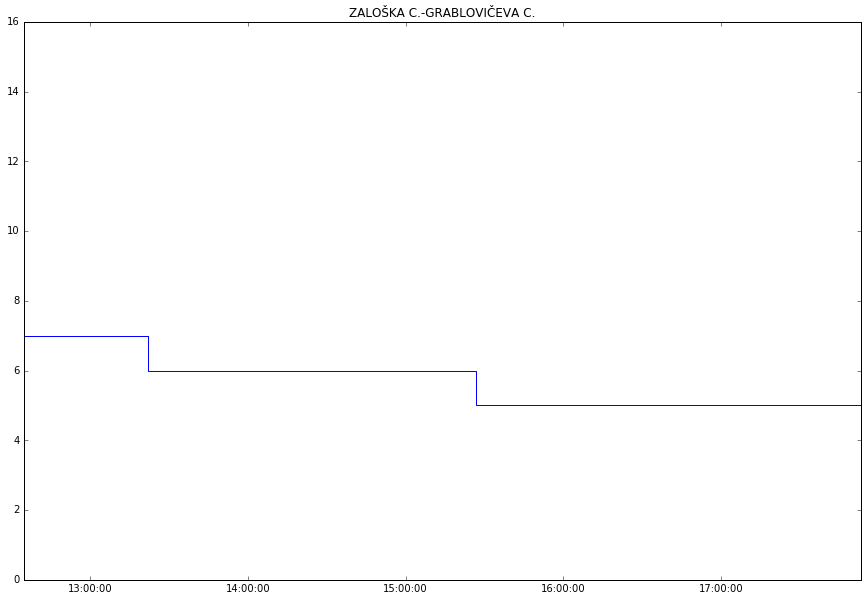

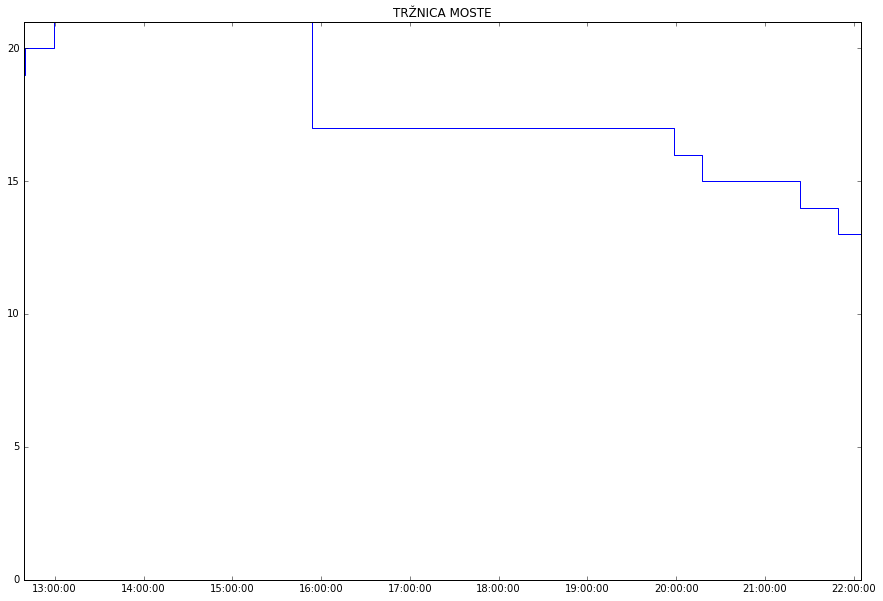

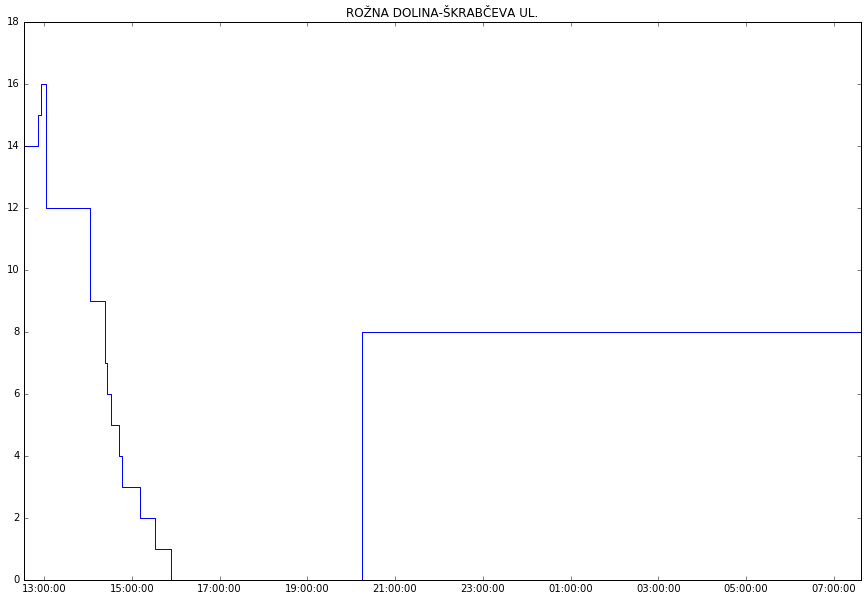

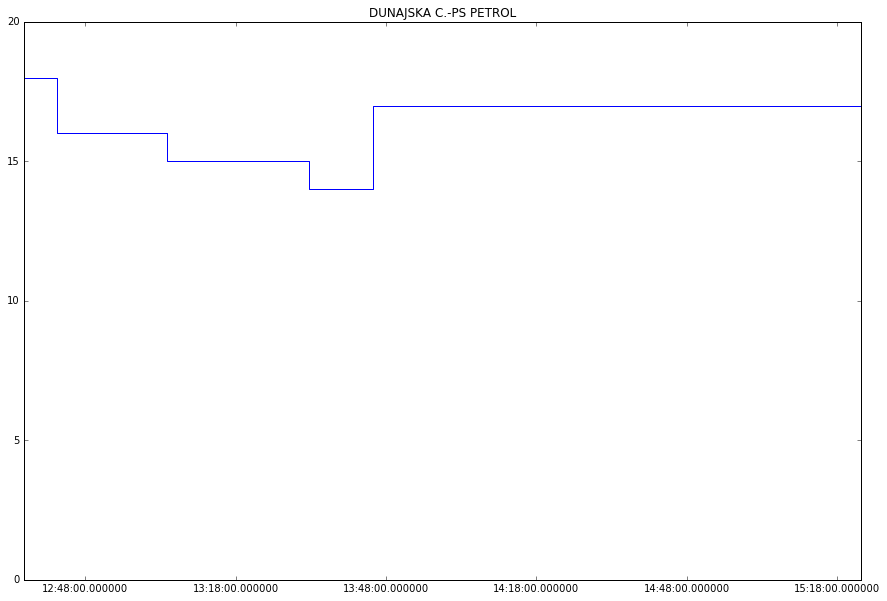

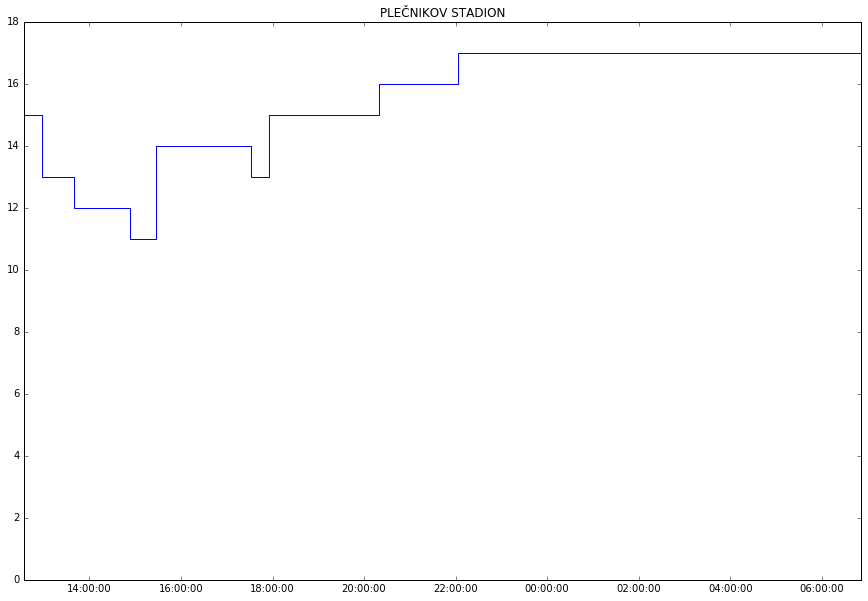

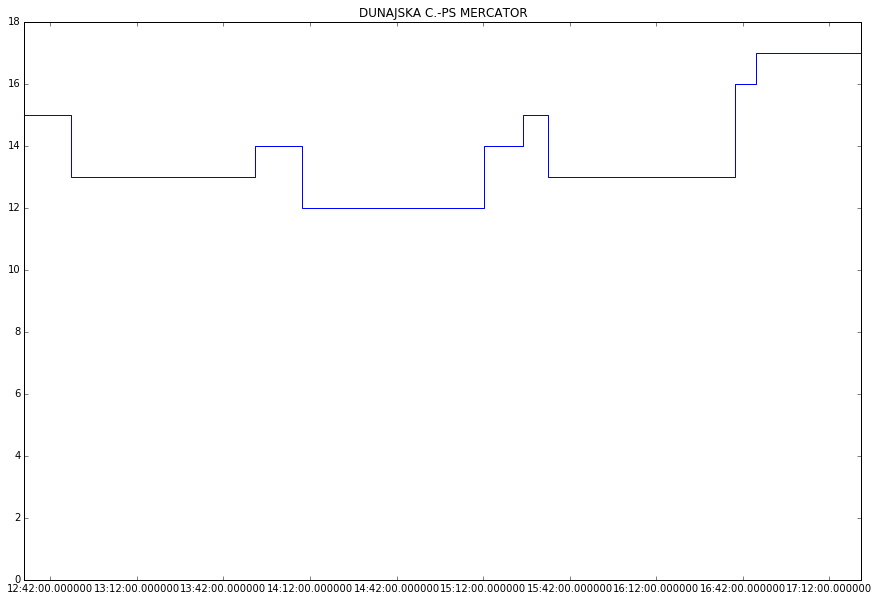

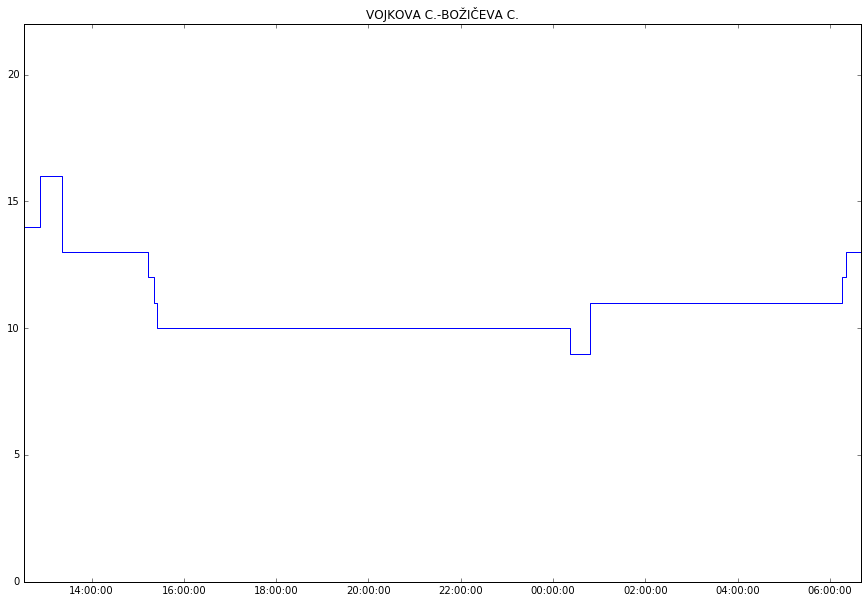

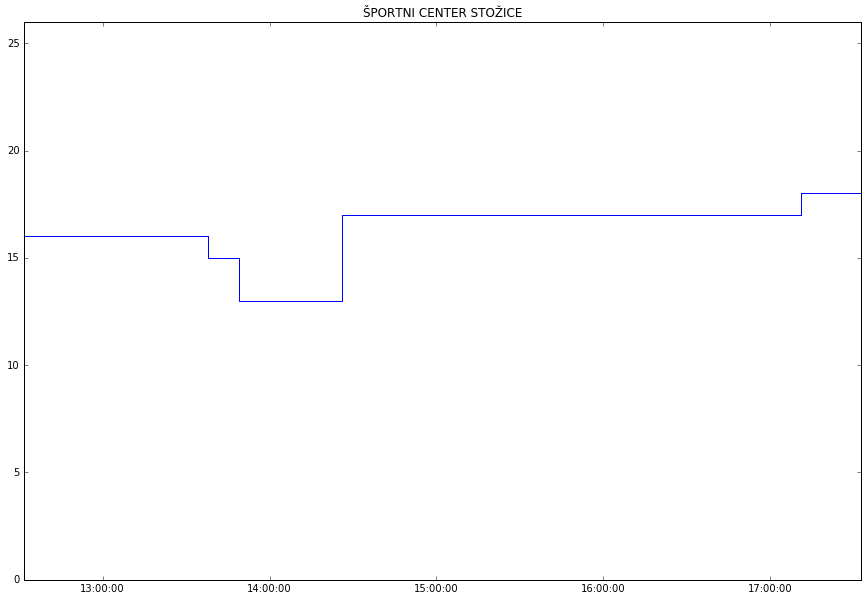

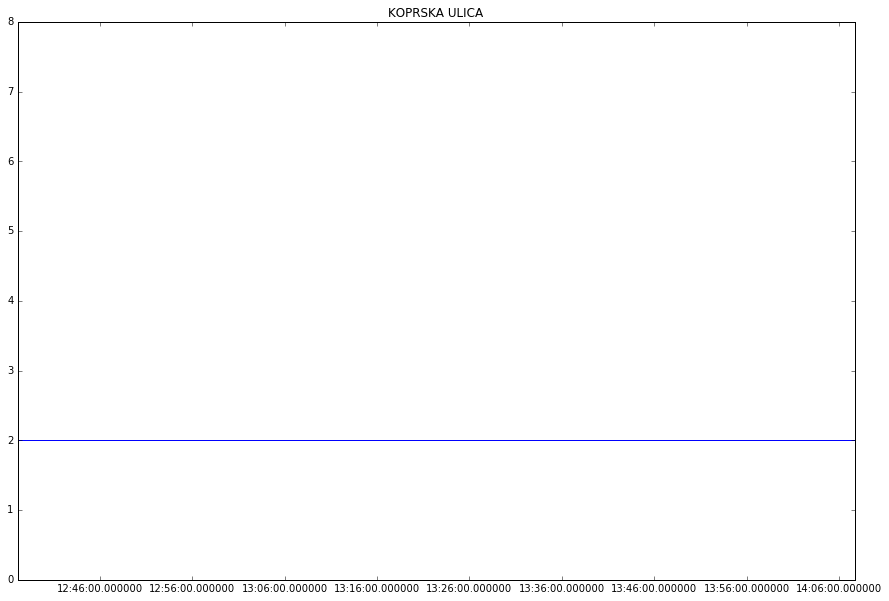

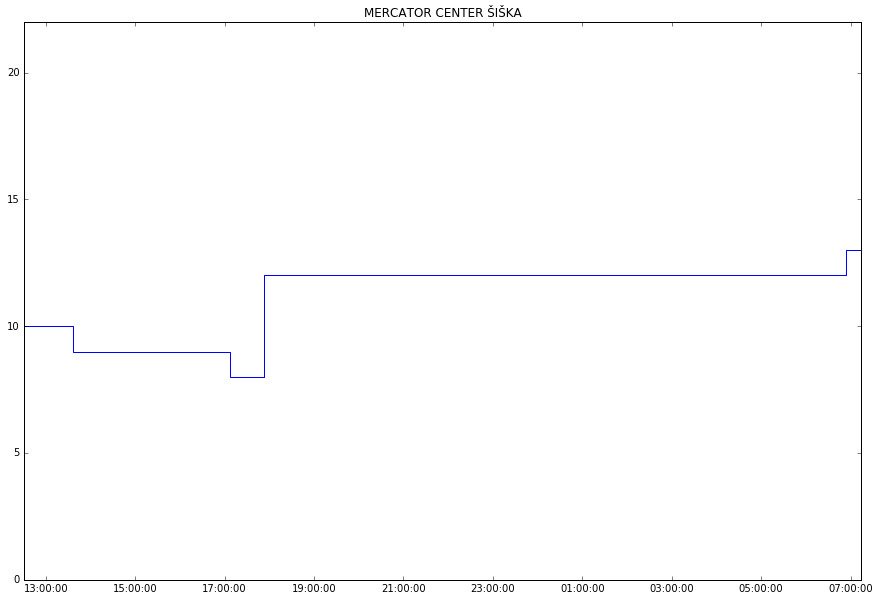

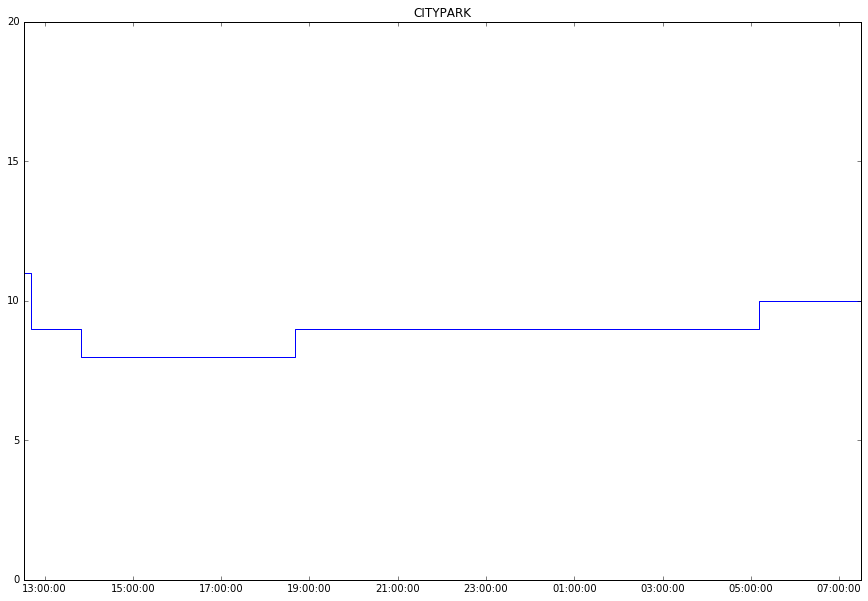

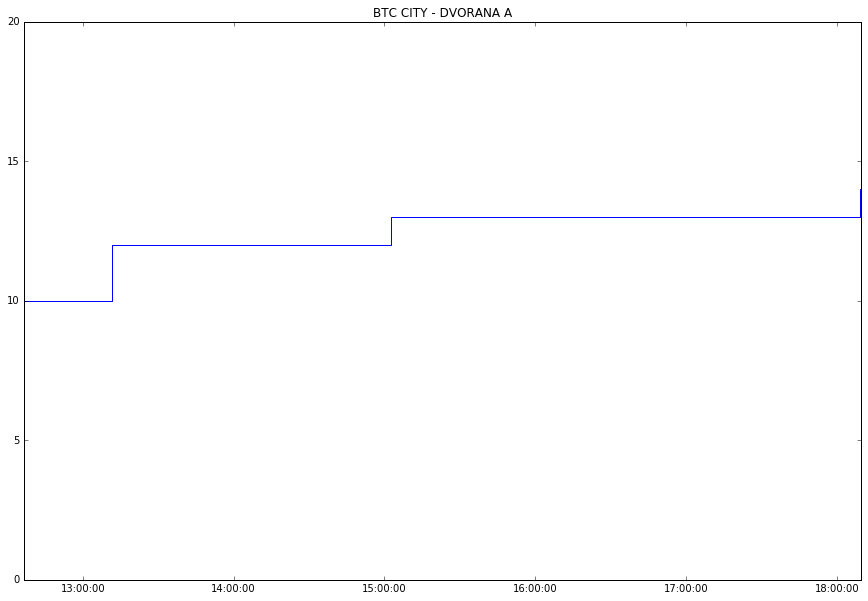

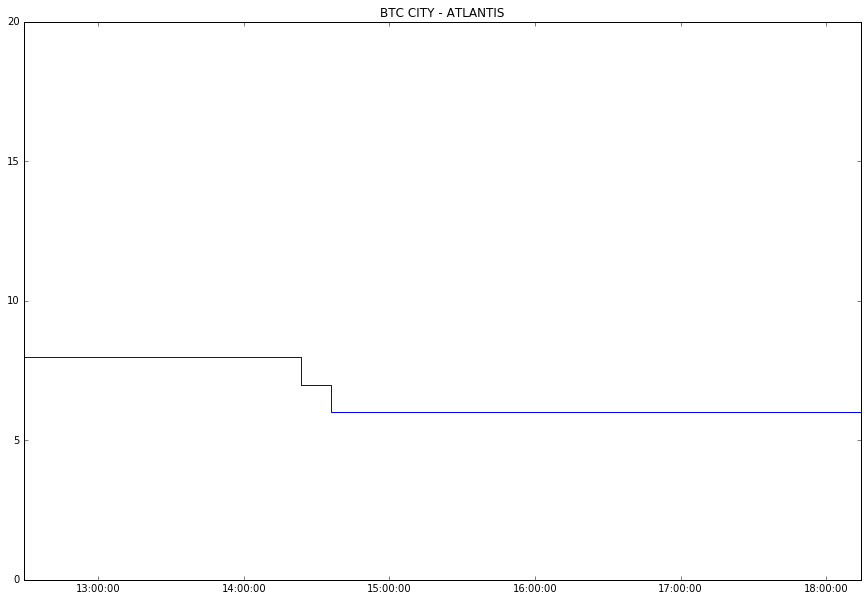

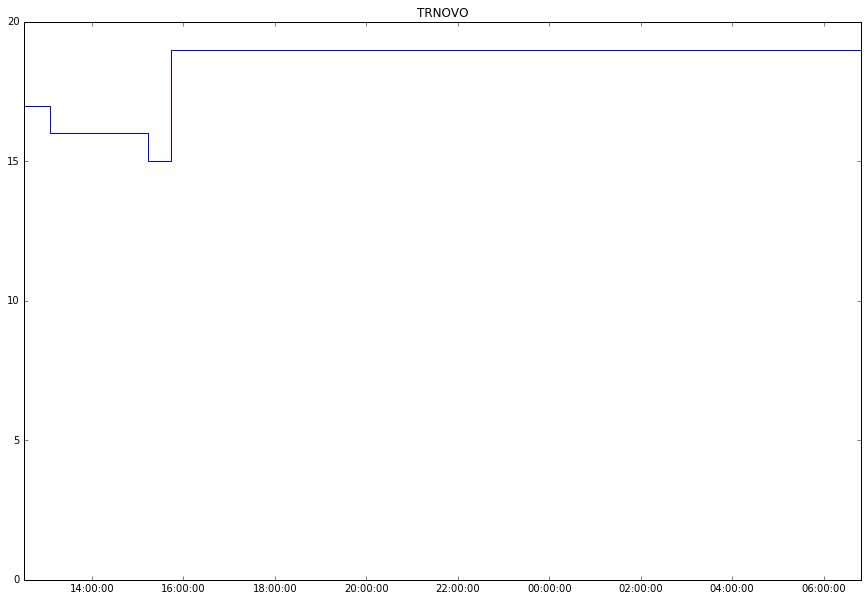

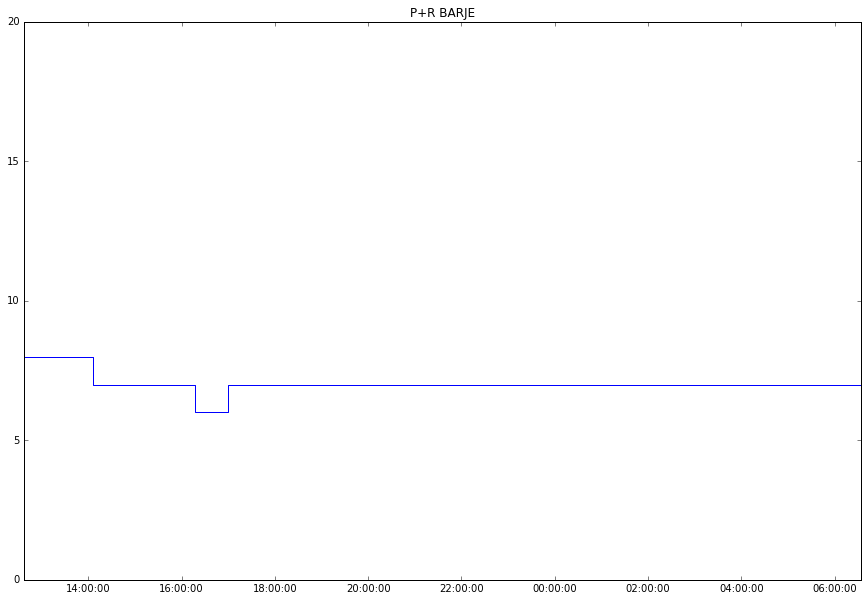

In [74]:
for col in station_data_available.columns:
    data = station_data_available[col].dropna()
    plt.title(station_info_s["name"][col])
    plt.ylim(0, station_info_s["bike_stands"][col])
    plt.plot(data, linestyle="steps")
    plt.show()

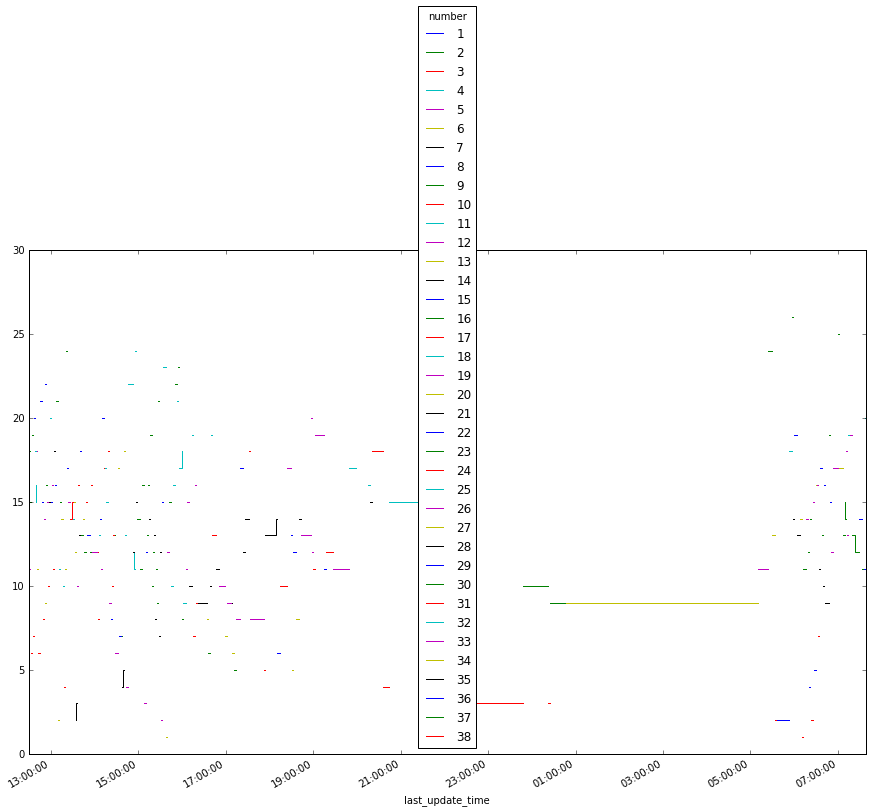

In [41]:
station_data_available.plot(linestyle="steps")

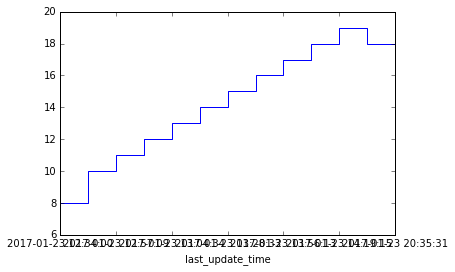

In [21]:
station_data_full[station_data_full["number"] == 3]["available_bike_stands"].plot(linestyle="steps")

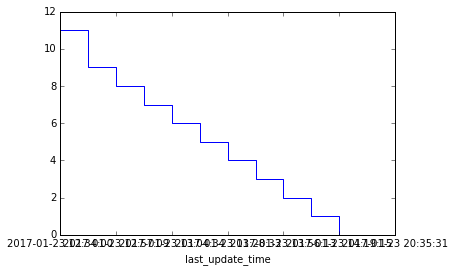

In [22]:
station_data_full[station_data_full["number"] == 3]["available_bikes"].plot(linestyle="steps")